In [3]:
# Importaciones de las librerias necesarias
# %pip install xlrd
# %pip install pandas
# %pip install openpyxl

import pandas as pd

file_path_Datos = r'raw_data\Perfil_Empresas_Imp_2019_Web.xlsx'

file_path = r'raw_data'

columnas_a_leer = ['Provincia_Ubicacion', 'Valor_FOB_USD', 'Valor_CIF_USD', 'Capitulo_desc_SA', 'Cod_capitulo_SA']

#Creación del dataframe con todos los datos
df = pd.read_excel(file_path_Datos, usecols=columnas_a_leer)


In [73]:
#Creación de dataframe sumando todos los costos de importación por provincia 

df_grouped = df.groupby('Provincia_Ubicacion')['Valor_CIF_USD'].sum().reset_index()


suma_total = df['Valor_CIF_USD'].sum()

#Creación de una columna para mostrar el porcentaje correspondiente a la cantidad
df_grouped['Porcentaje'] = (df_grouped['Valor_CIF_USD'] / suma_total)*100

print(f"Costo total por importaciones: {suma_total}")

df_grouped_sorted_1 = df_grouped.sort_values('Valor_CIF_USD', ascending=False).reset_index()

df_grouped_sorted_1 = df_grouped_sorted_1.drop(columns=['index'])

# El'Valor_CIF_USD' es una columna en 'df_grouped' y se aplica el formato normal
df_grouped_sorted_1['Valor_CIF_USD'] = df_grouped_sorted_1['Valor_CIF_USD'].apply(lambda x: '{:.2f}'.format(x))

df_products = df['Capitulo_desc_SA'] , df['Capitulo_desc_SA']


#print(df_products)

print(df_grouped_sorted_1)

Costo total por importaciones: 22202271906.72966
       Provincia_Ubicacion  Valor_CIF_USD  Porcentaje
0        Distrito Nacional  9320585584.00   41.980324
1            Santo Domingo  4518787902.38   20.352818
2            San Cristóbal  3149361599.99   14.184862
3                 Santiago  2097379629.80    9.446689
4                La Romana   455405069.83    2.051164
5            La Altagracia   432508249.05    1.948036
6     San Pedro de Macorís   355690909.56    1.602047
7          Sánchez Ramírez   347202154.09    1.563814
8                Espaillat   327895994.95    1.476858
9                  La Vega   261228369.97    1.176584
10         Sin información   255492949.72    1.150751
11          Monseñor Nouel   239043283.06    1.076661
12            Puerto Plata    73720980.72    0.332043
13            Monte Cristi    60148583.35    0.270912
14                Valverde    52896873.52    0.238250
15                    Azua    47671570.00    0.214715
16                  Duarte    422

C:\Users\enman\AppData\Local\Temp\ipykernel_20104\1985473306.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


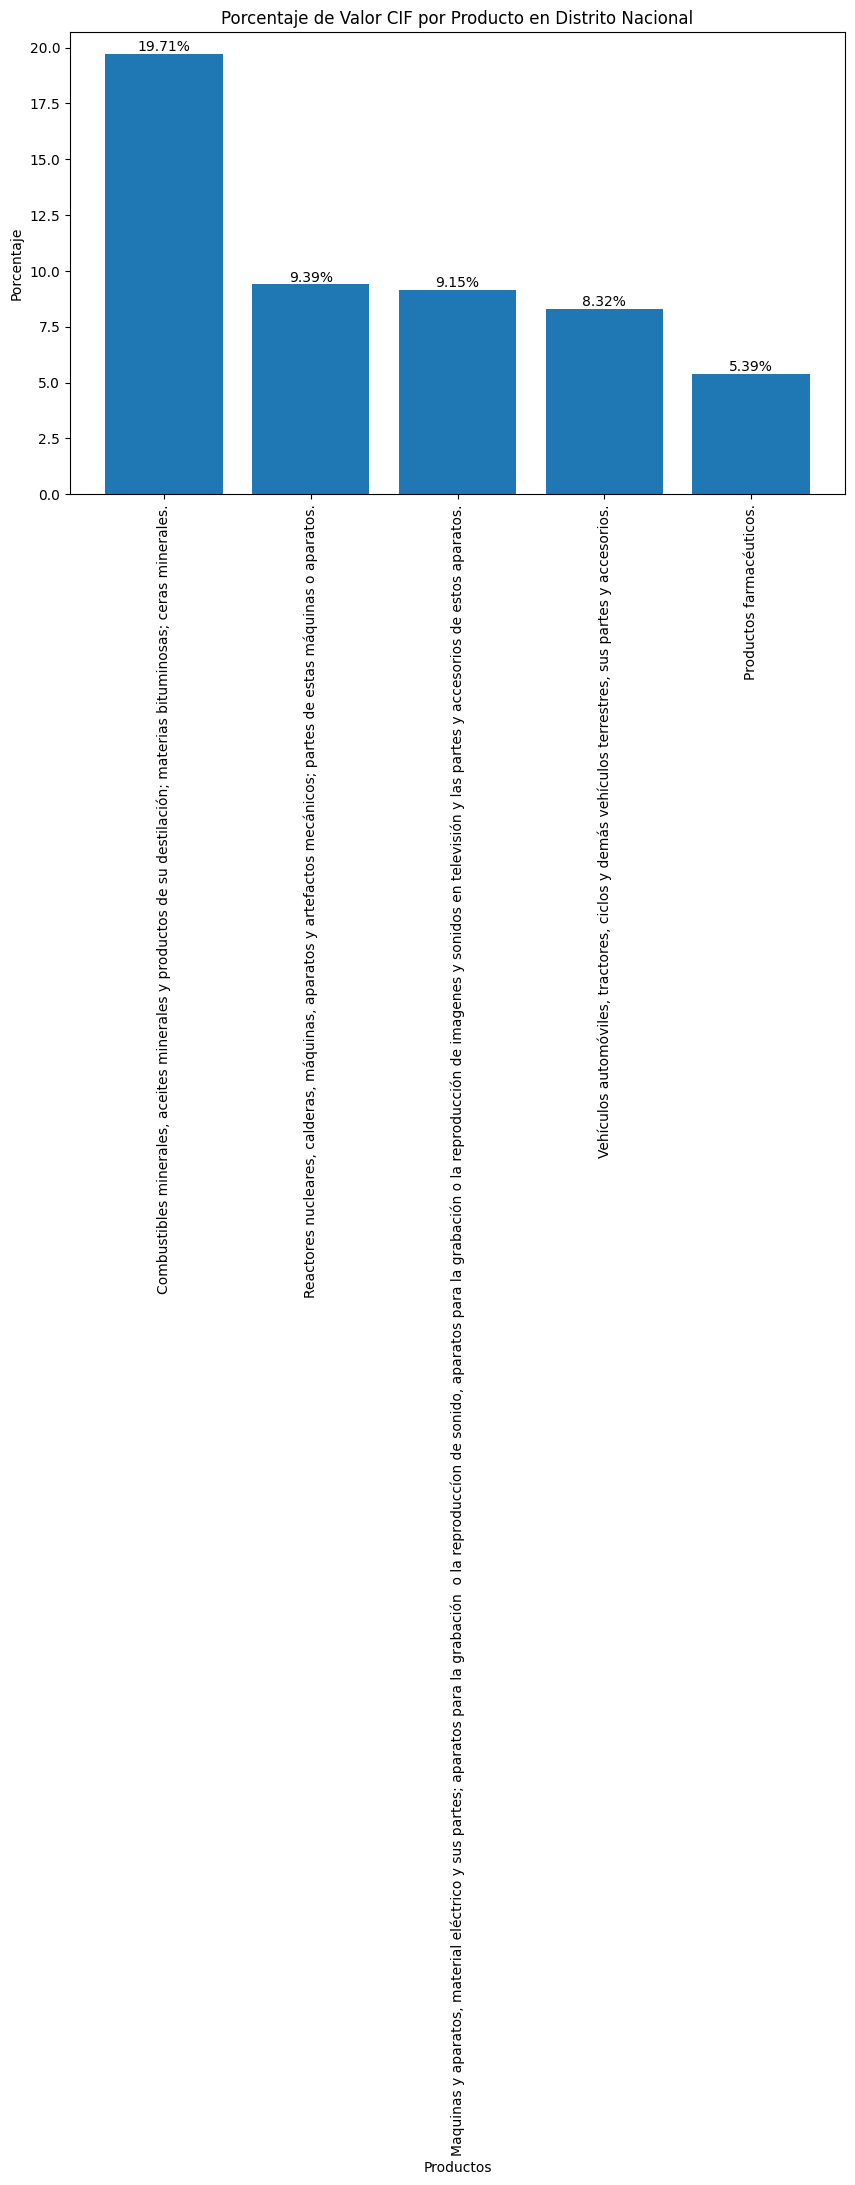

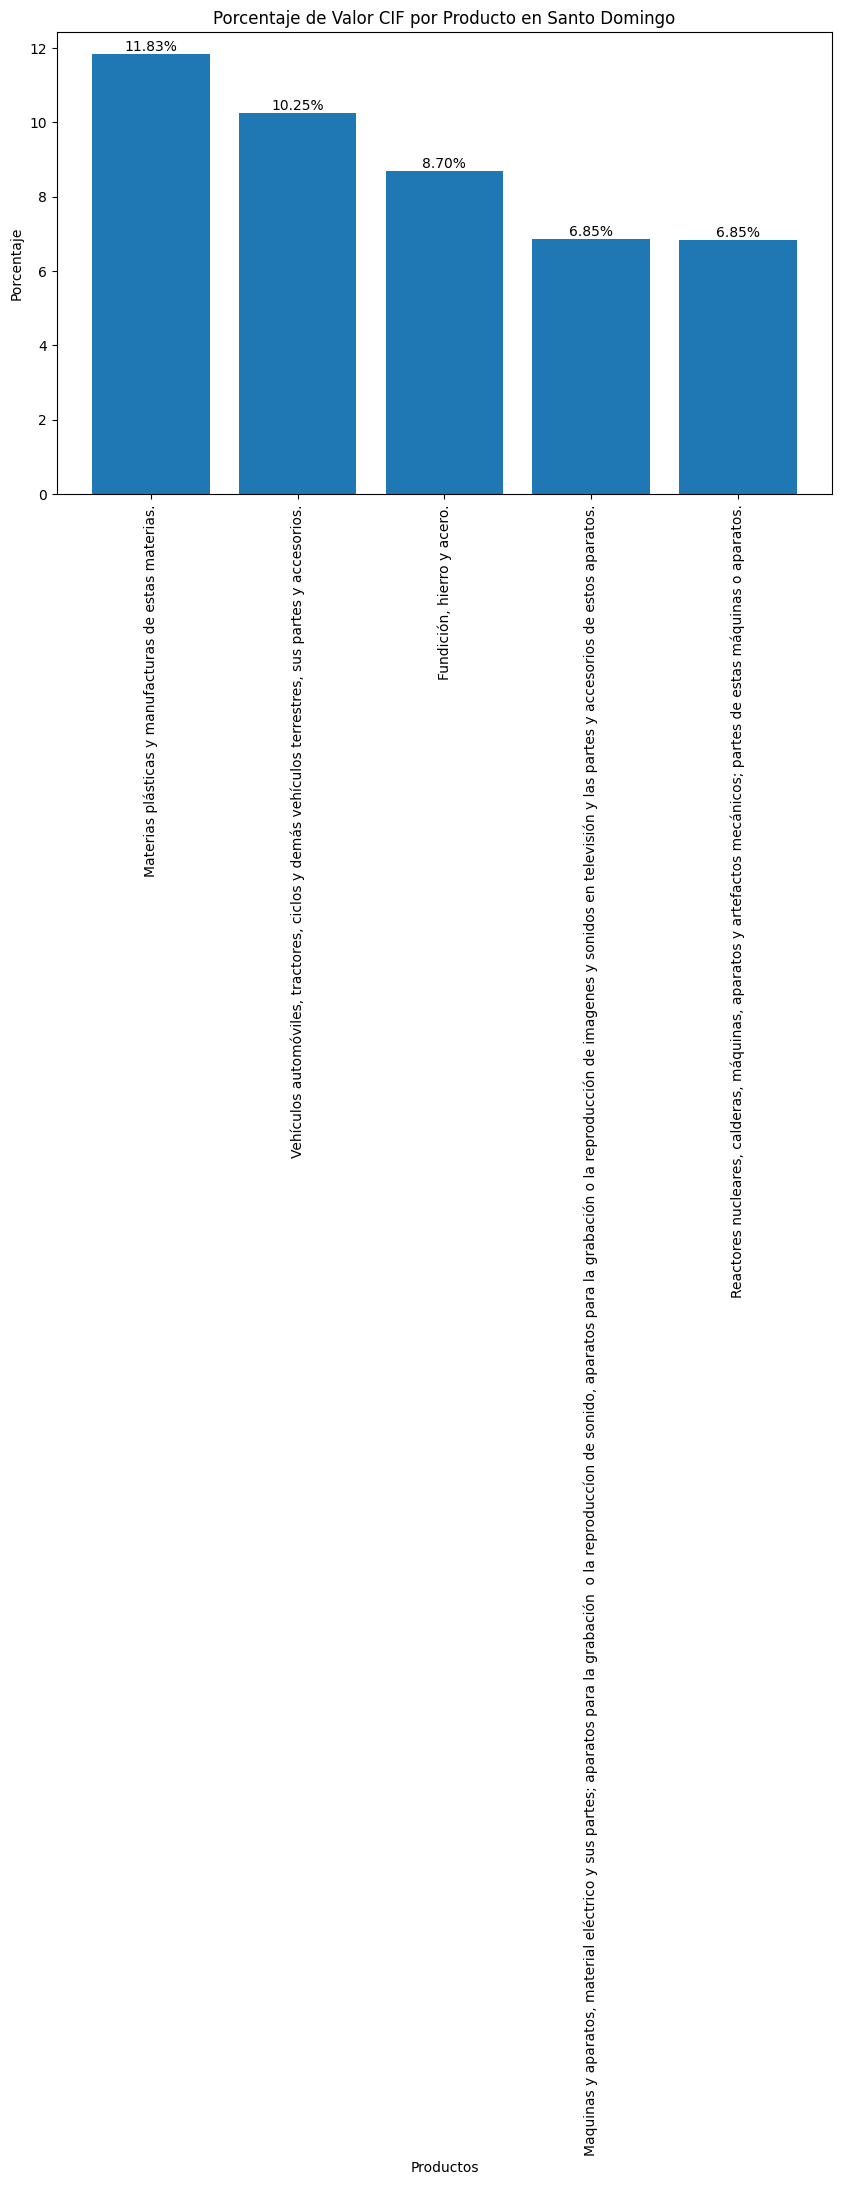

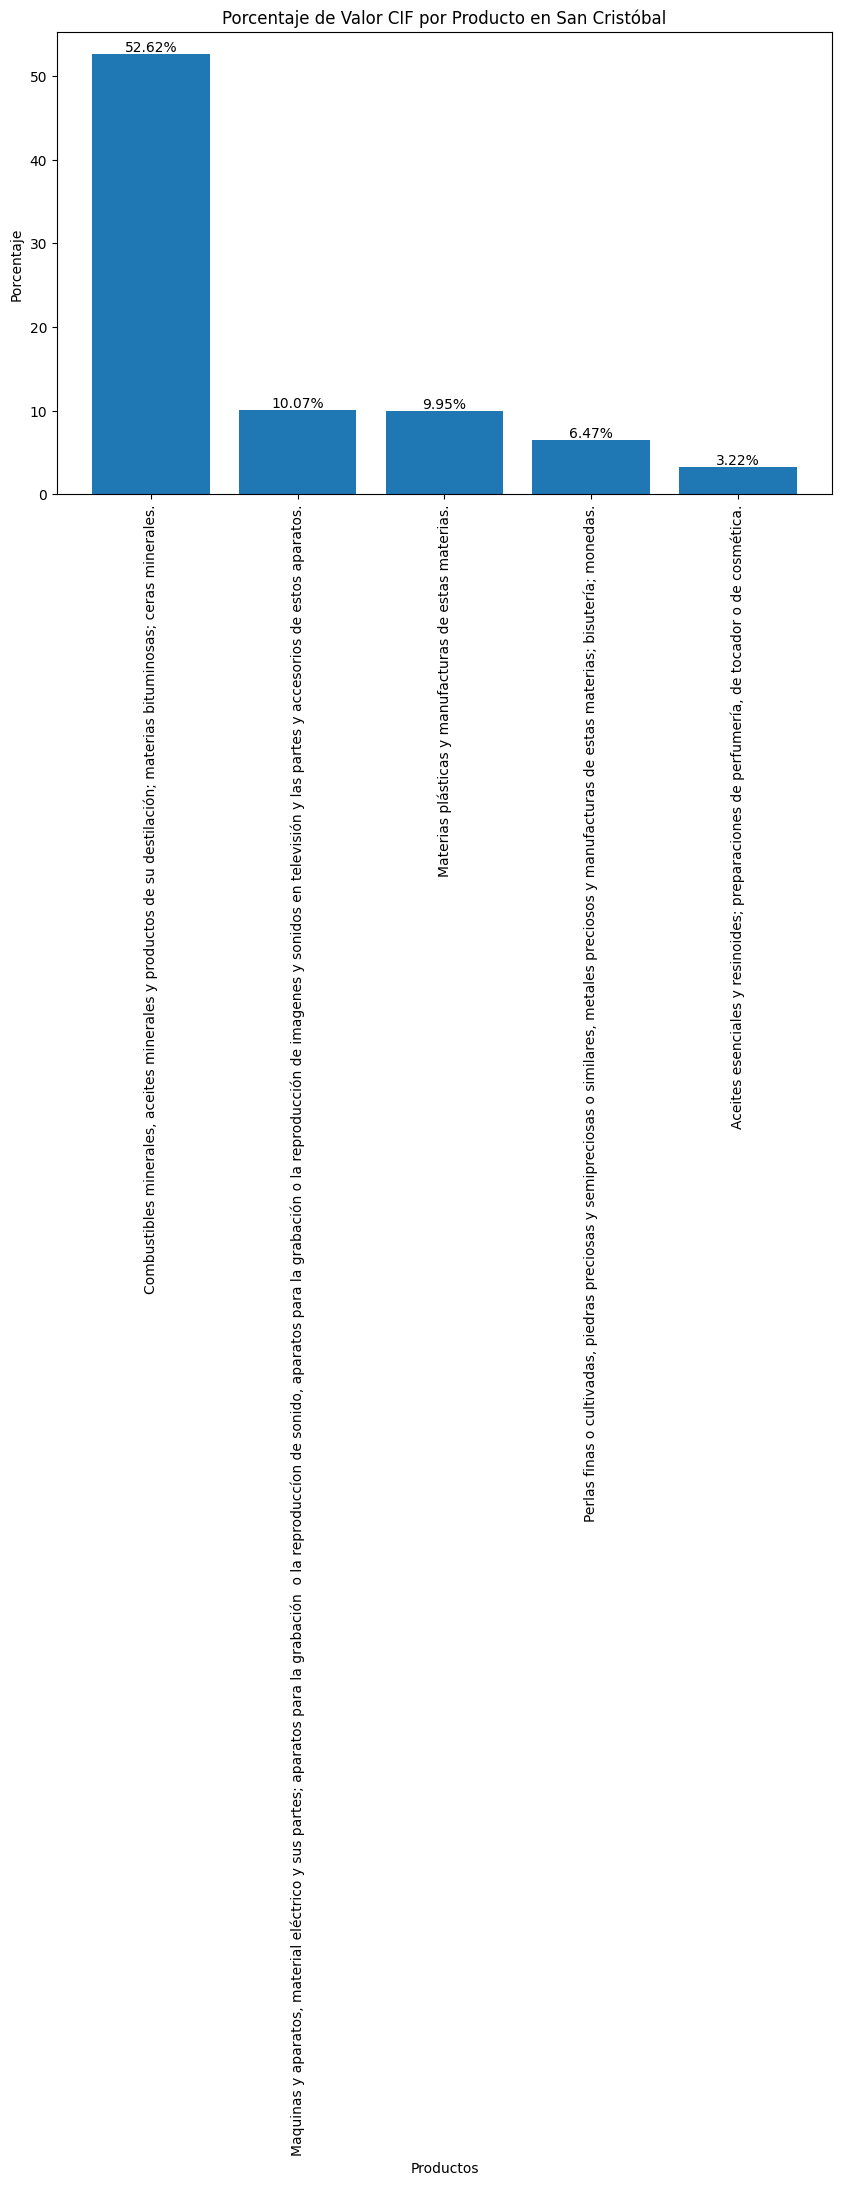

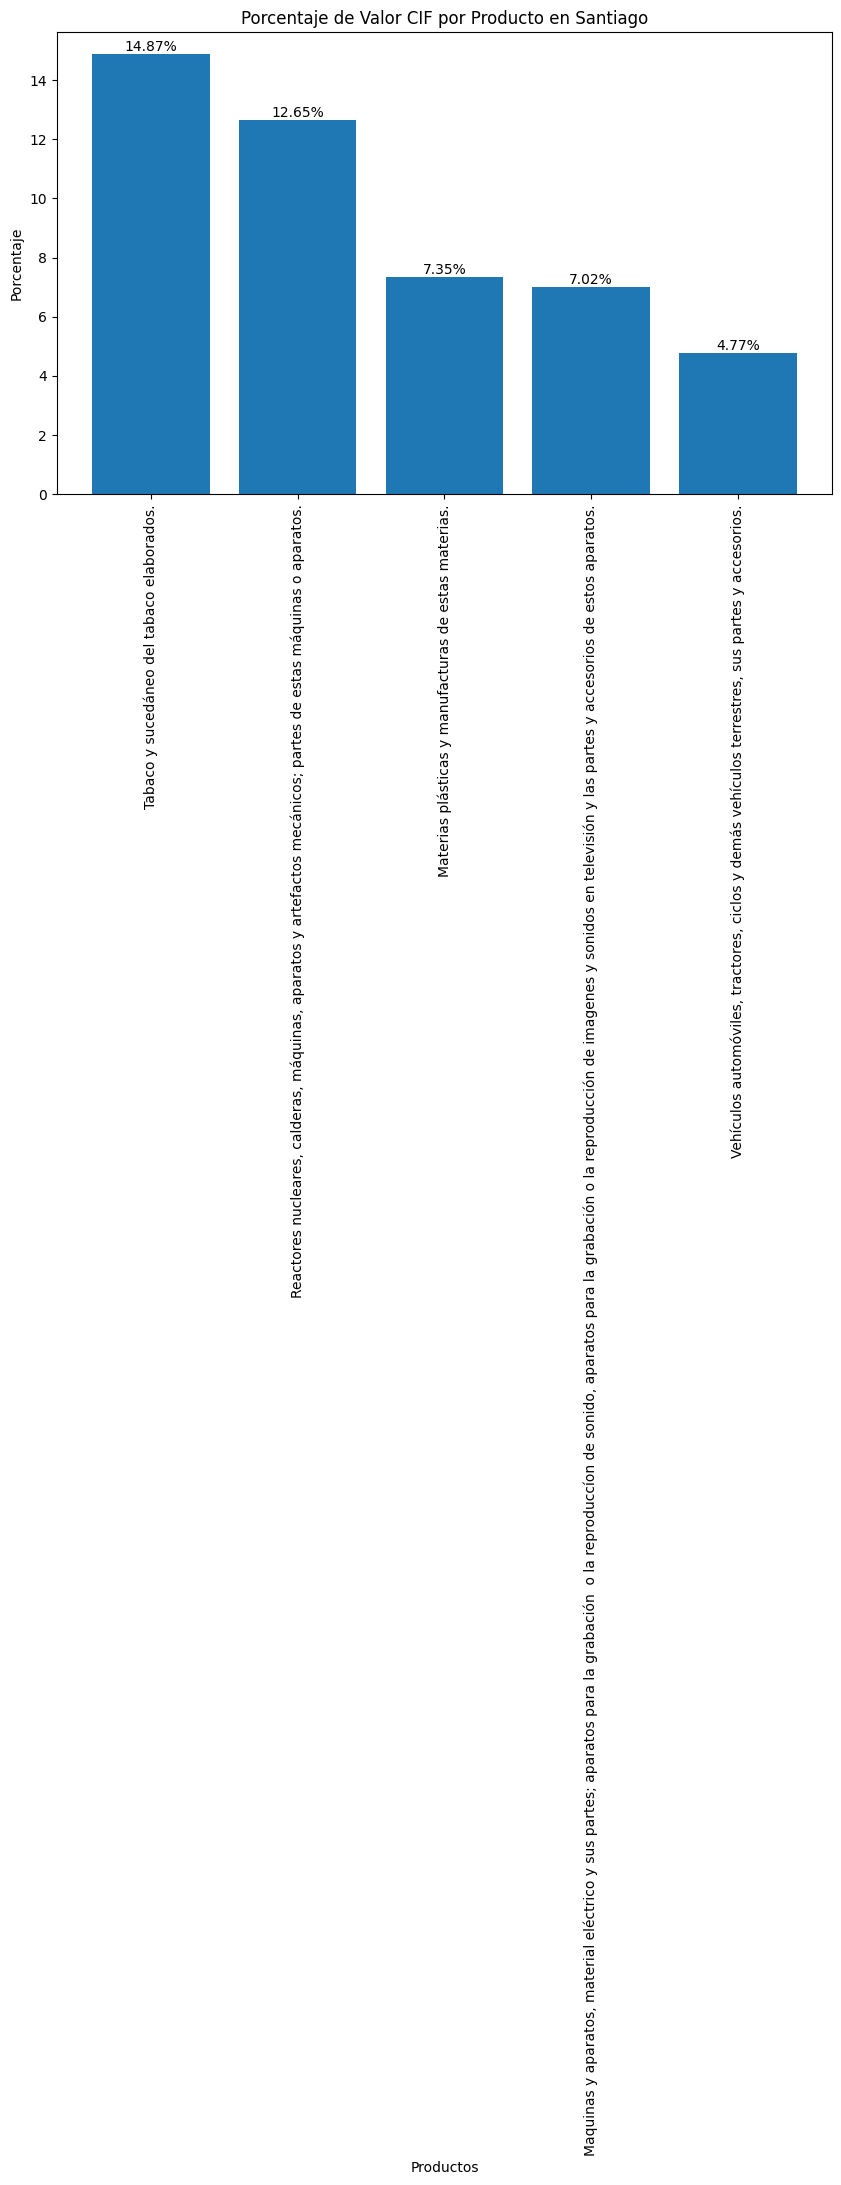

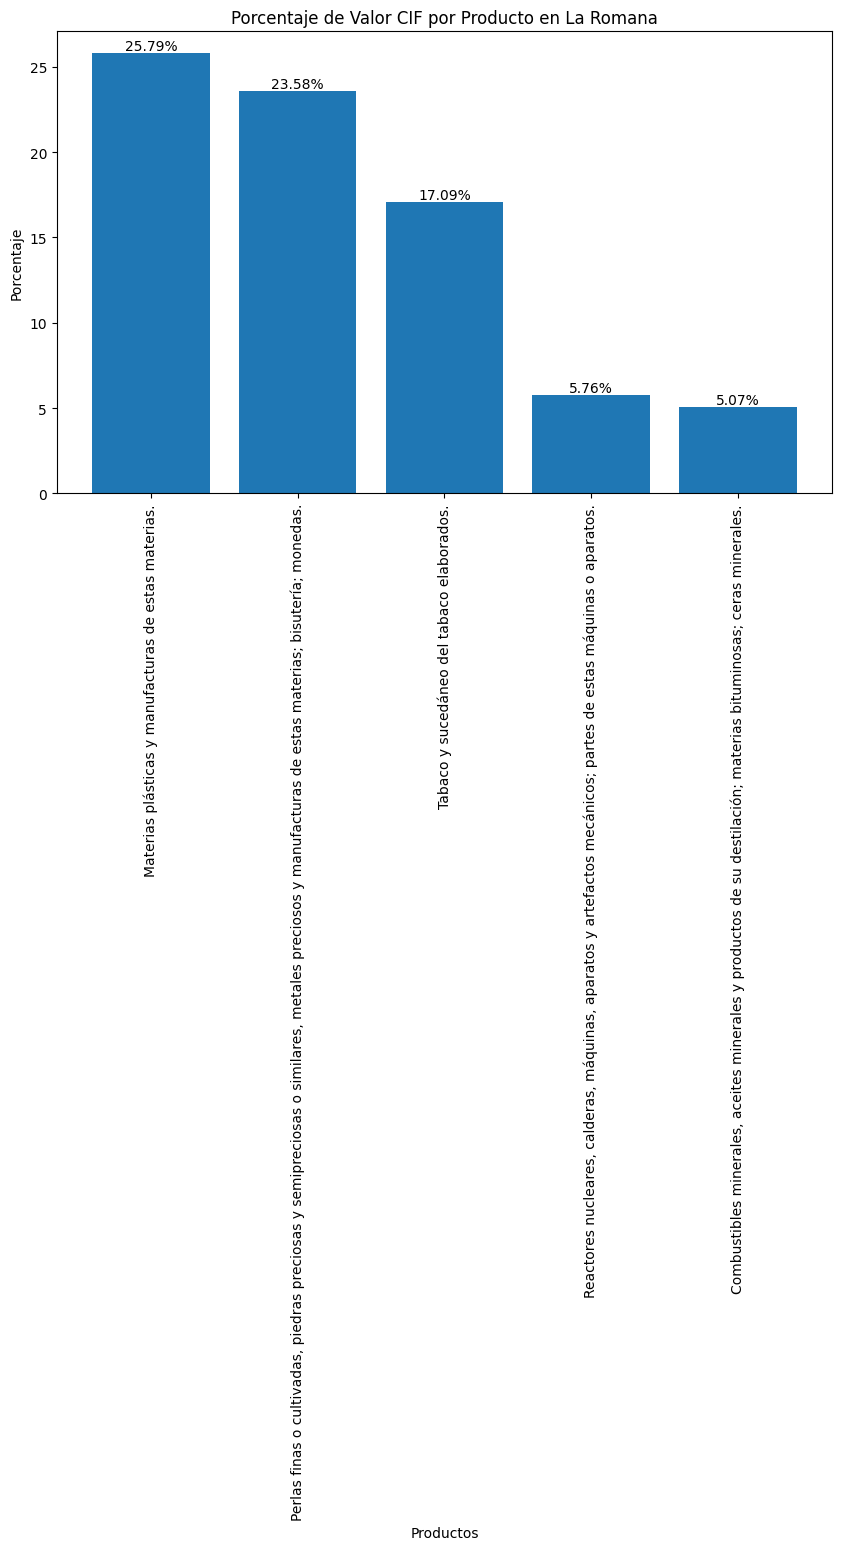

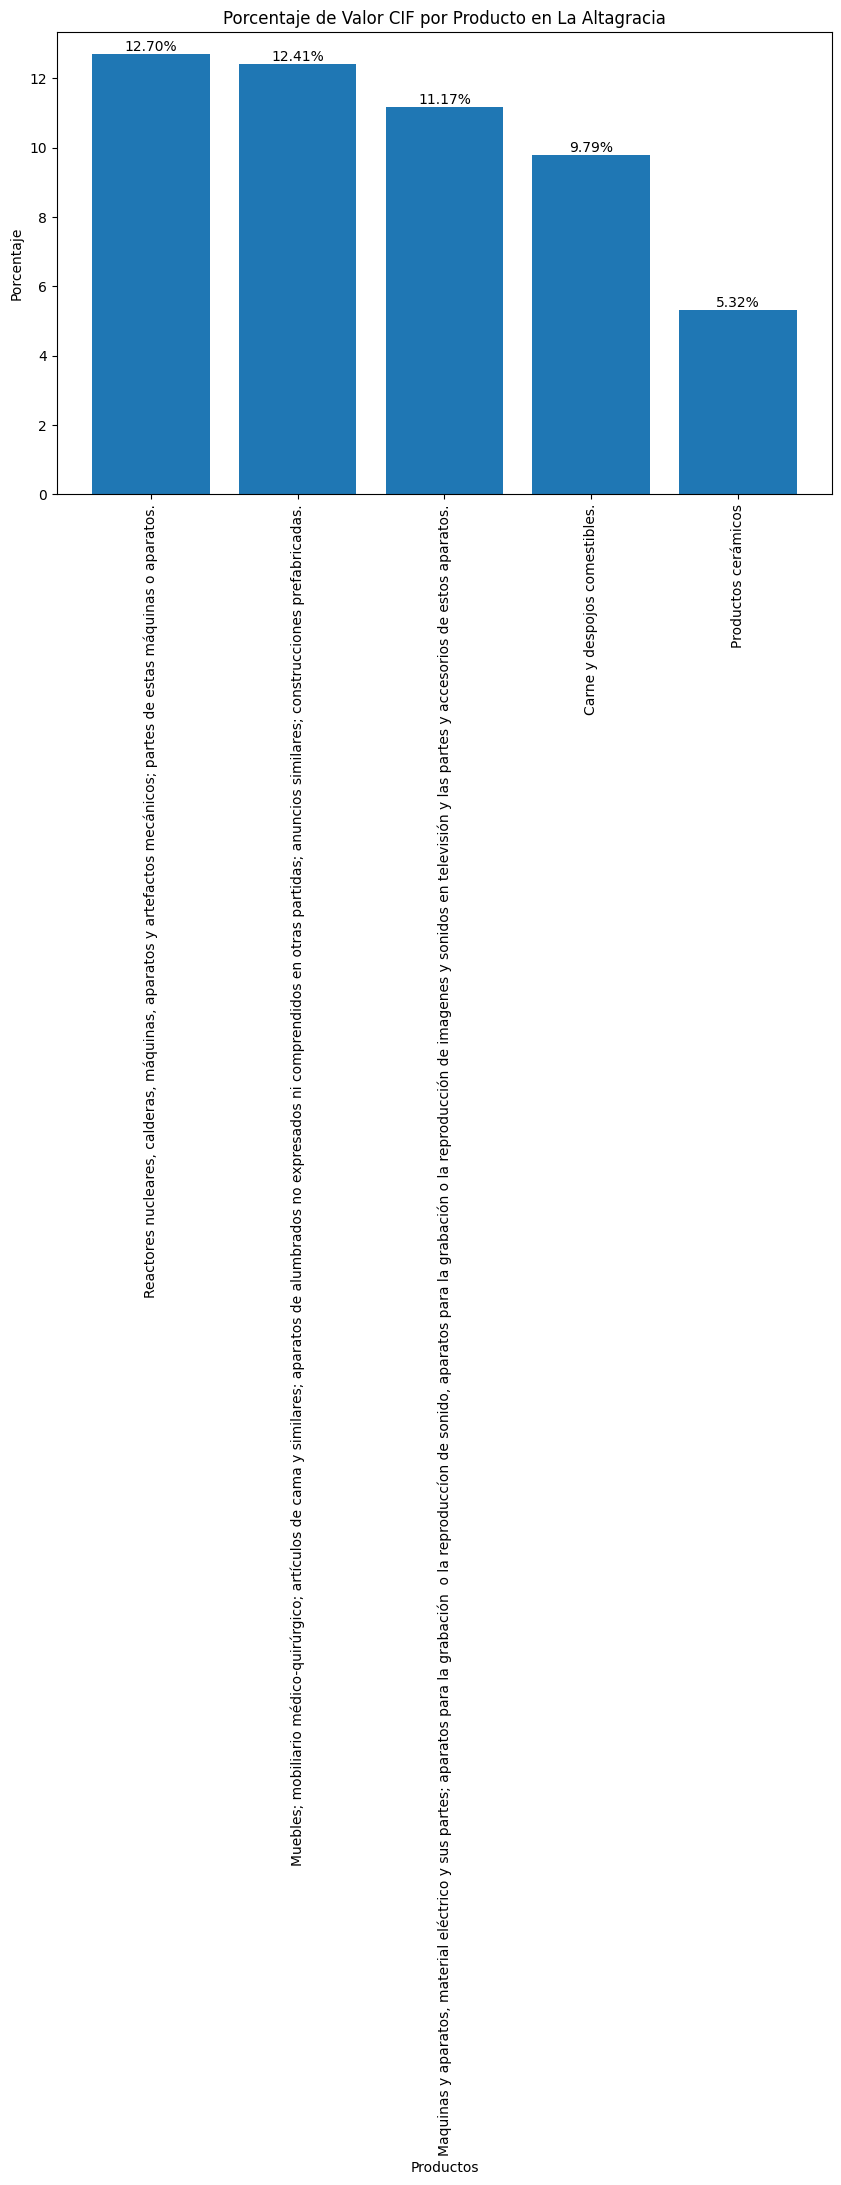

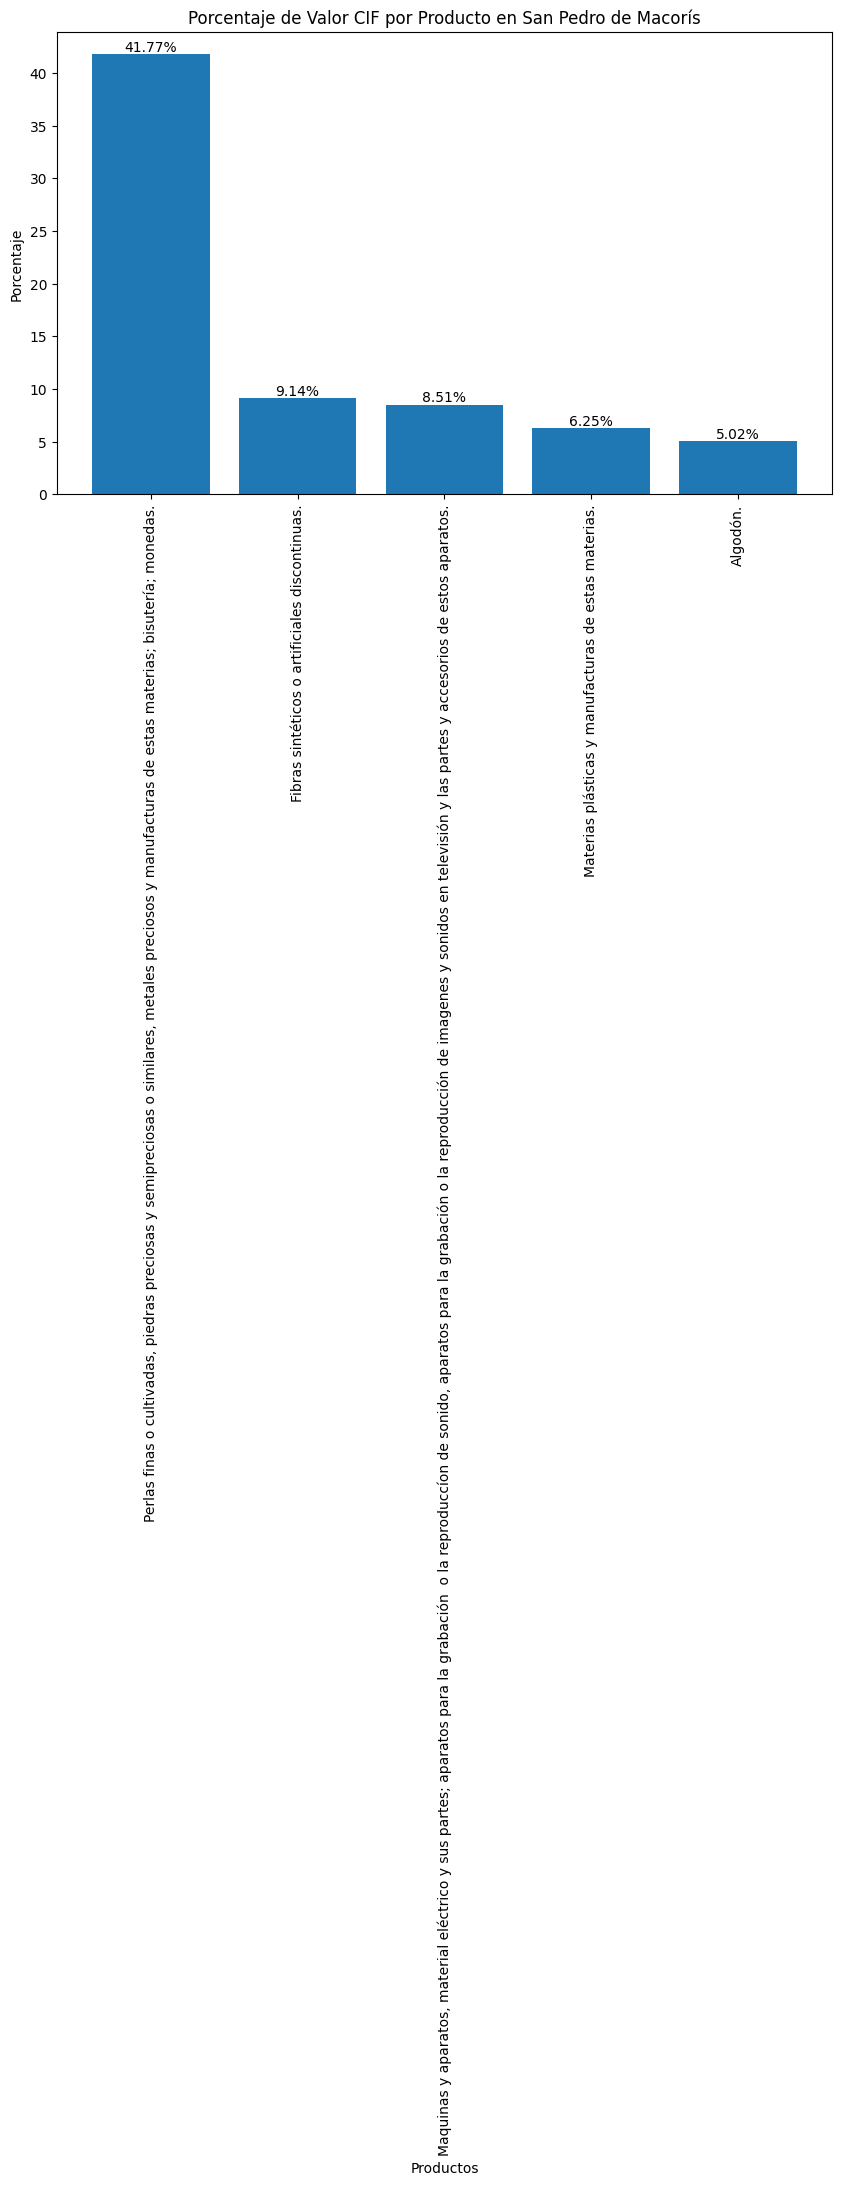

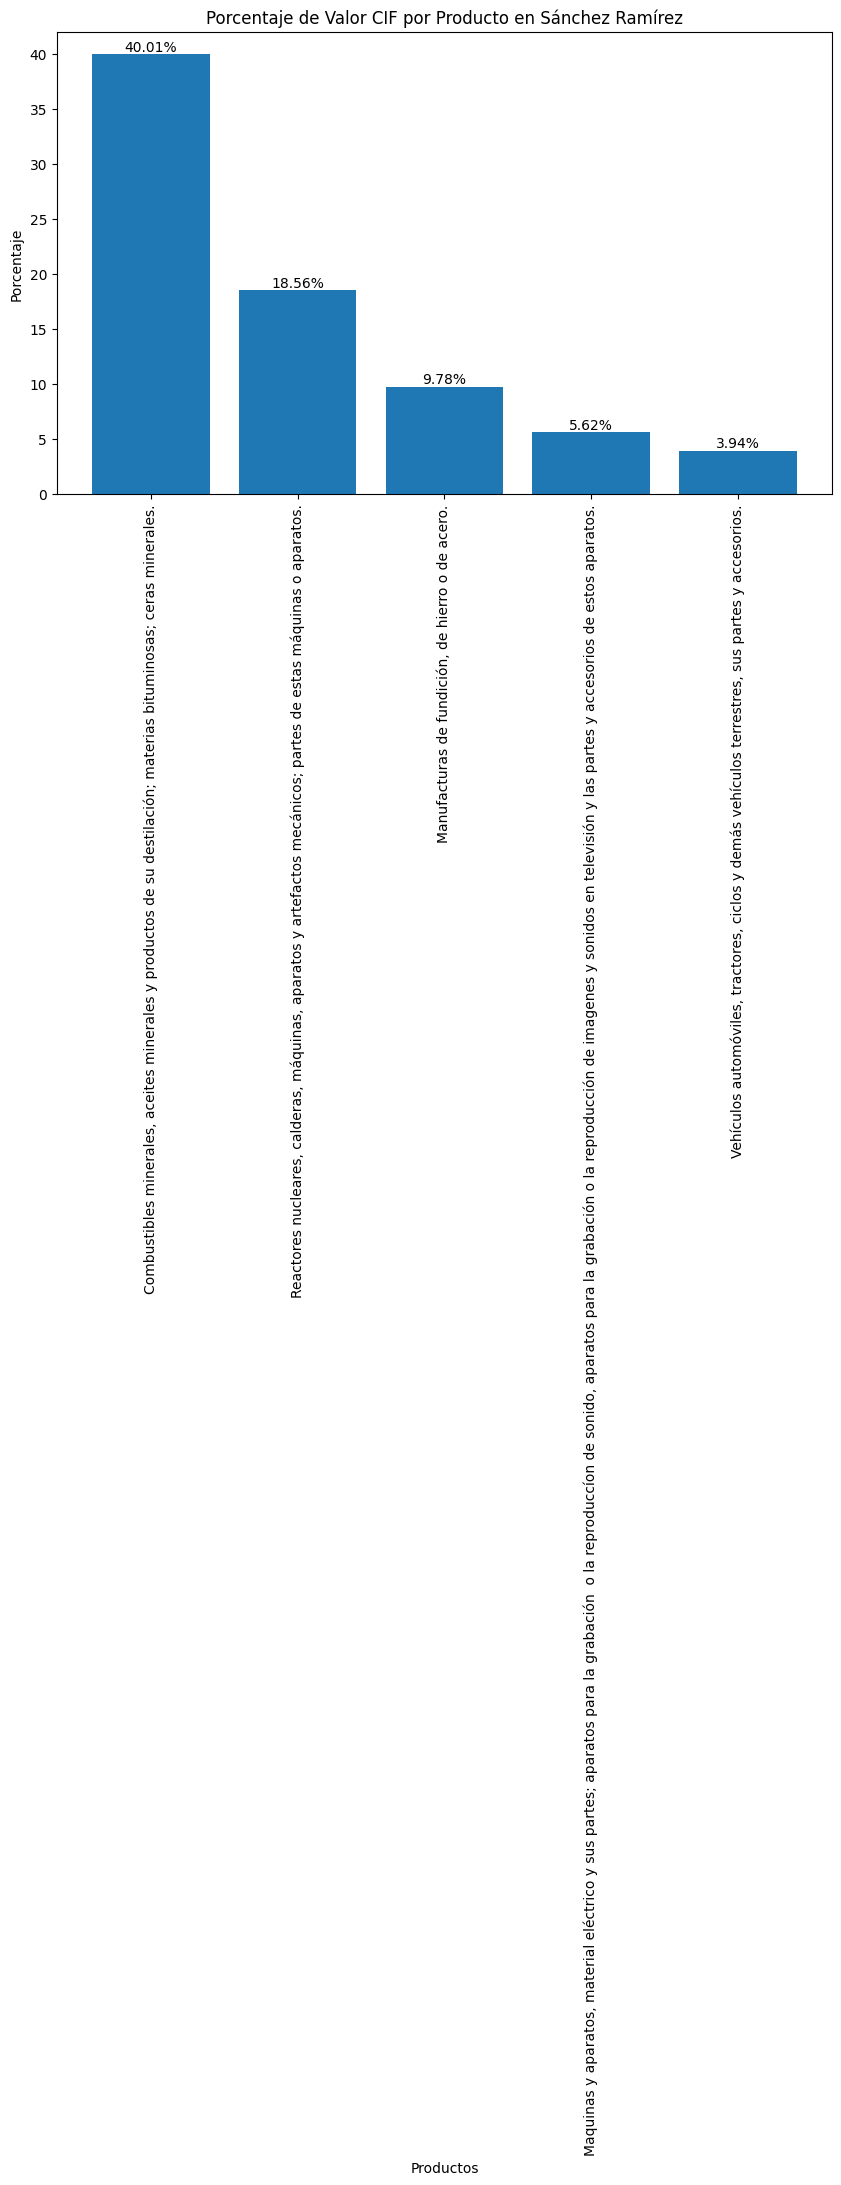

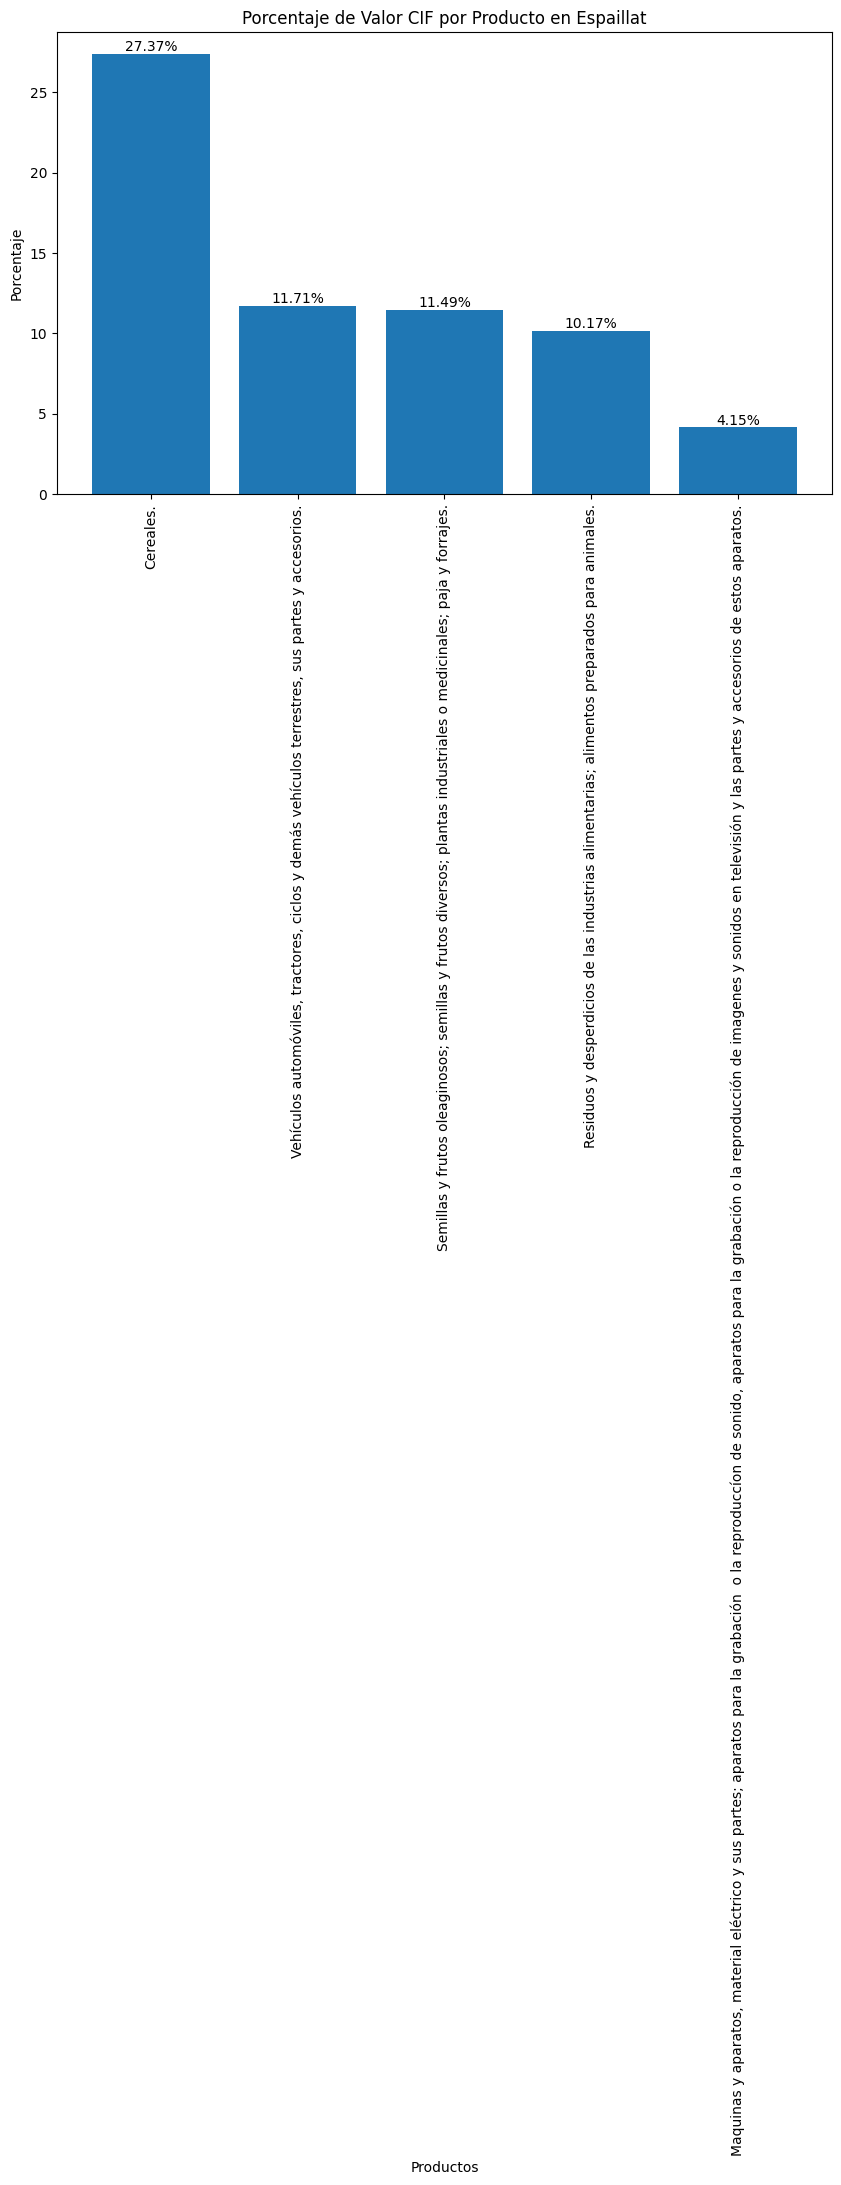

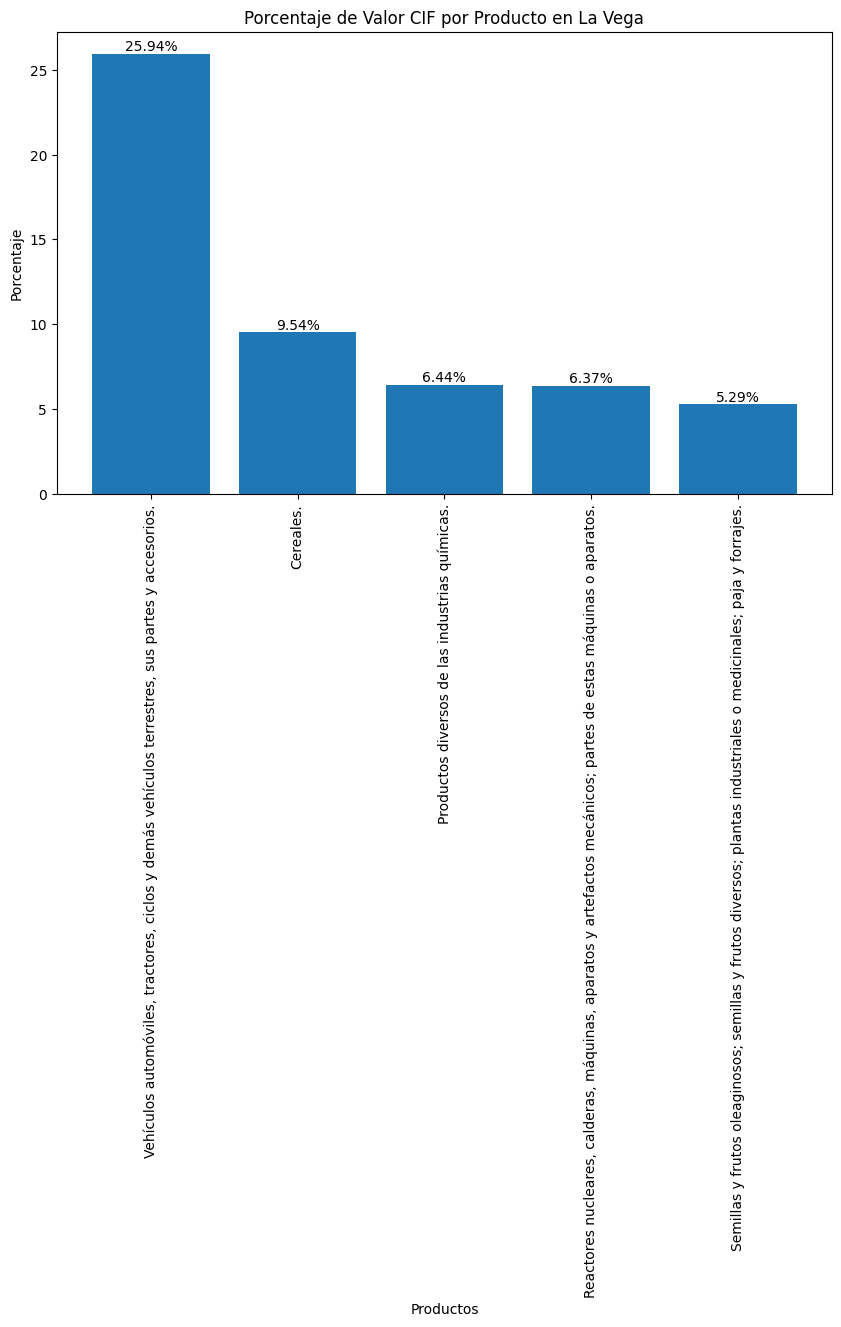

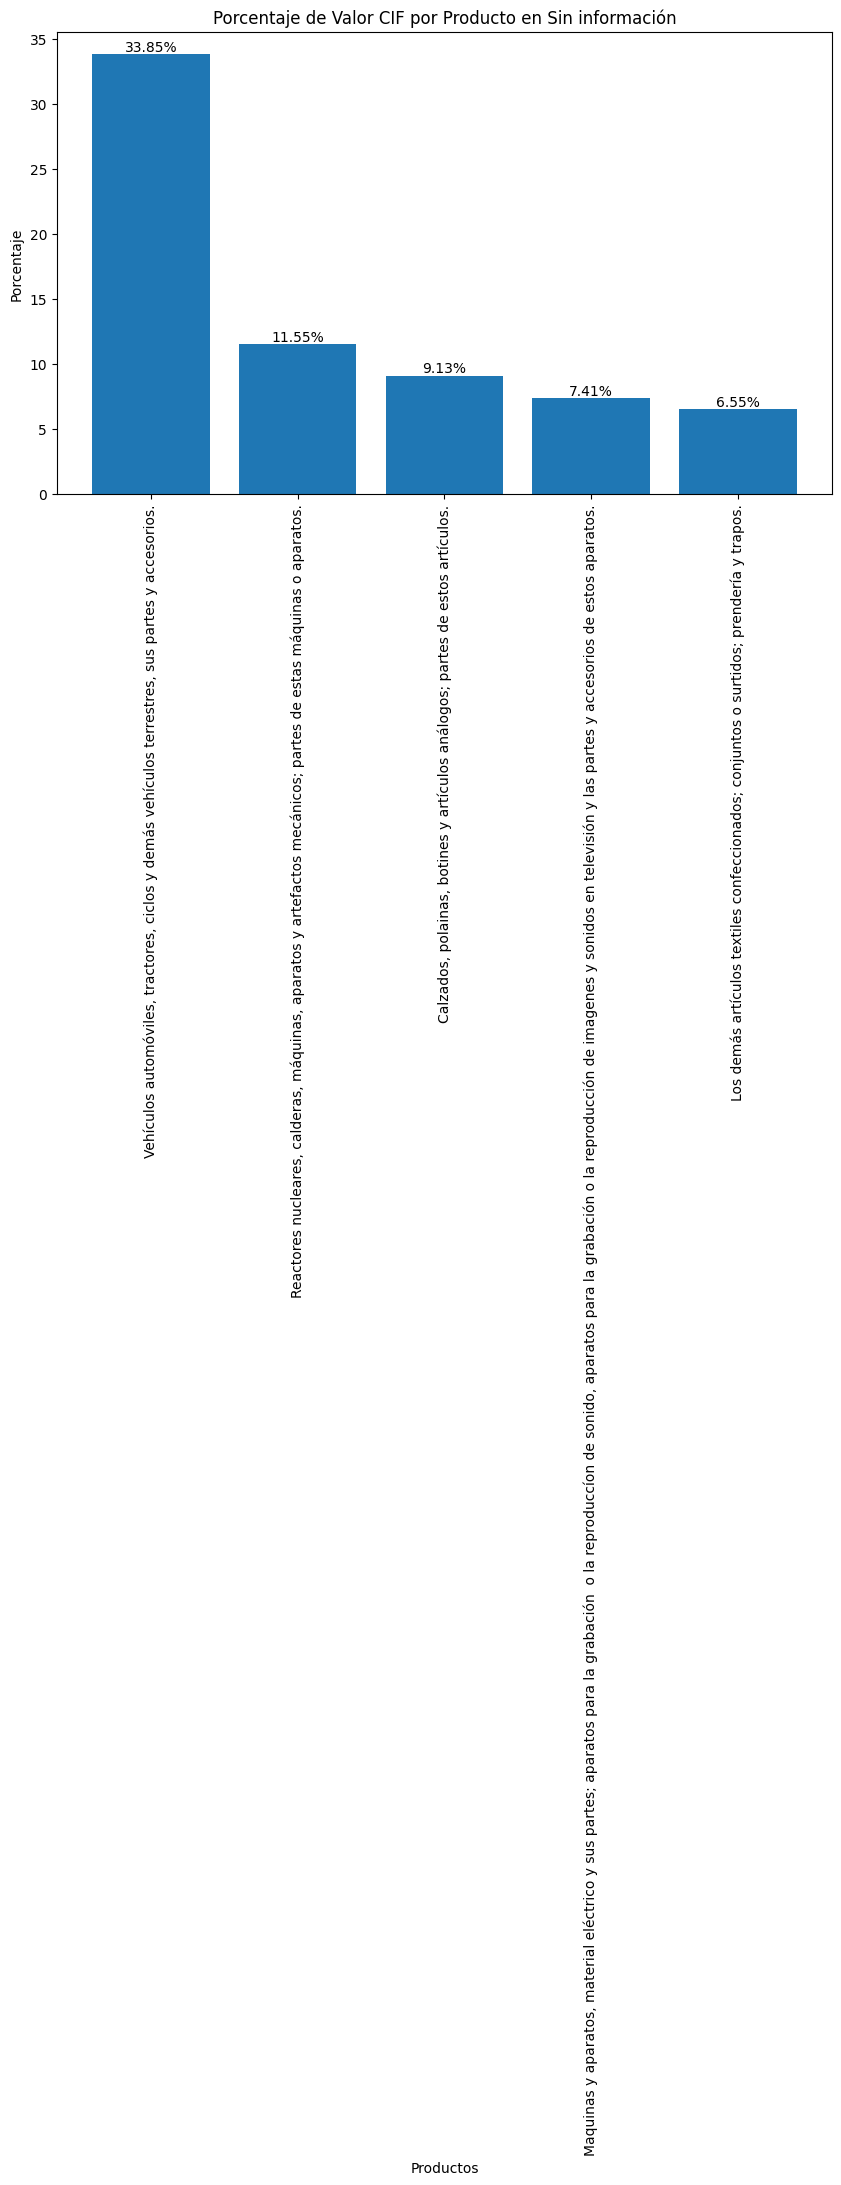

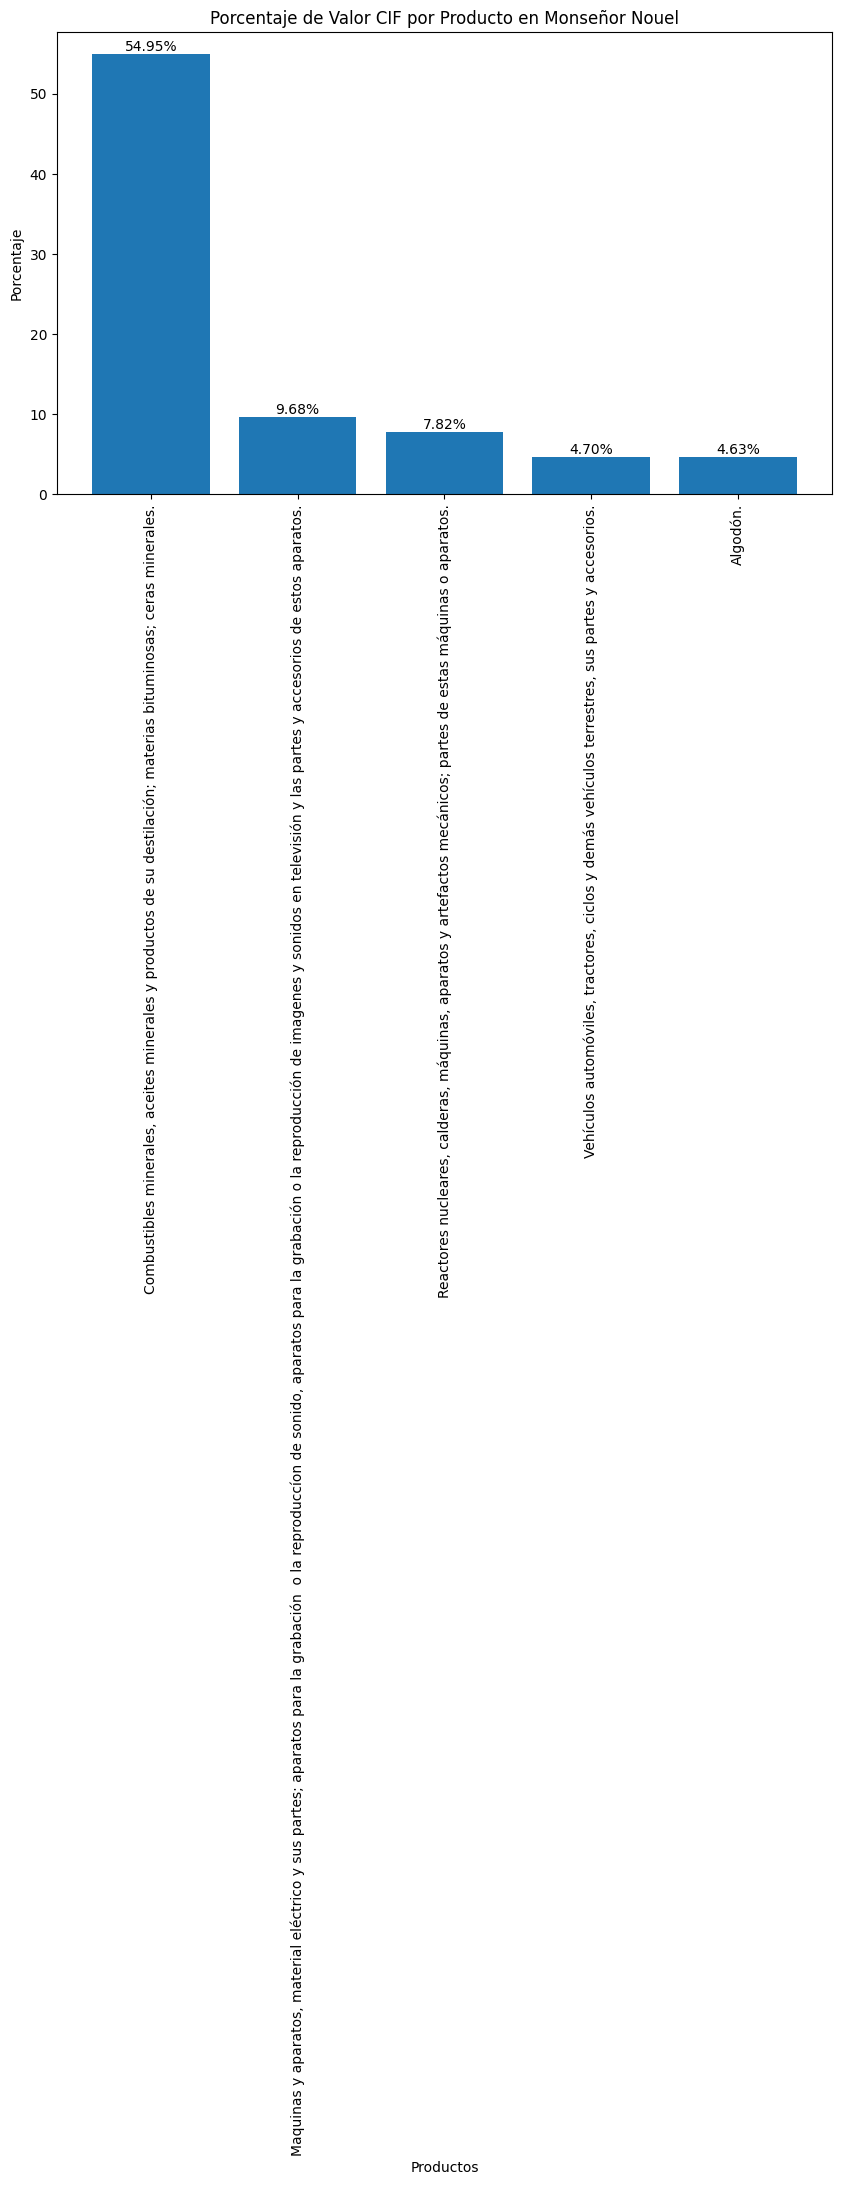

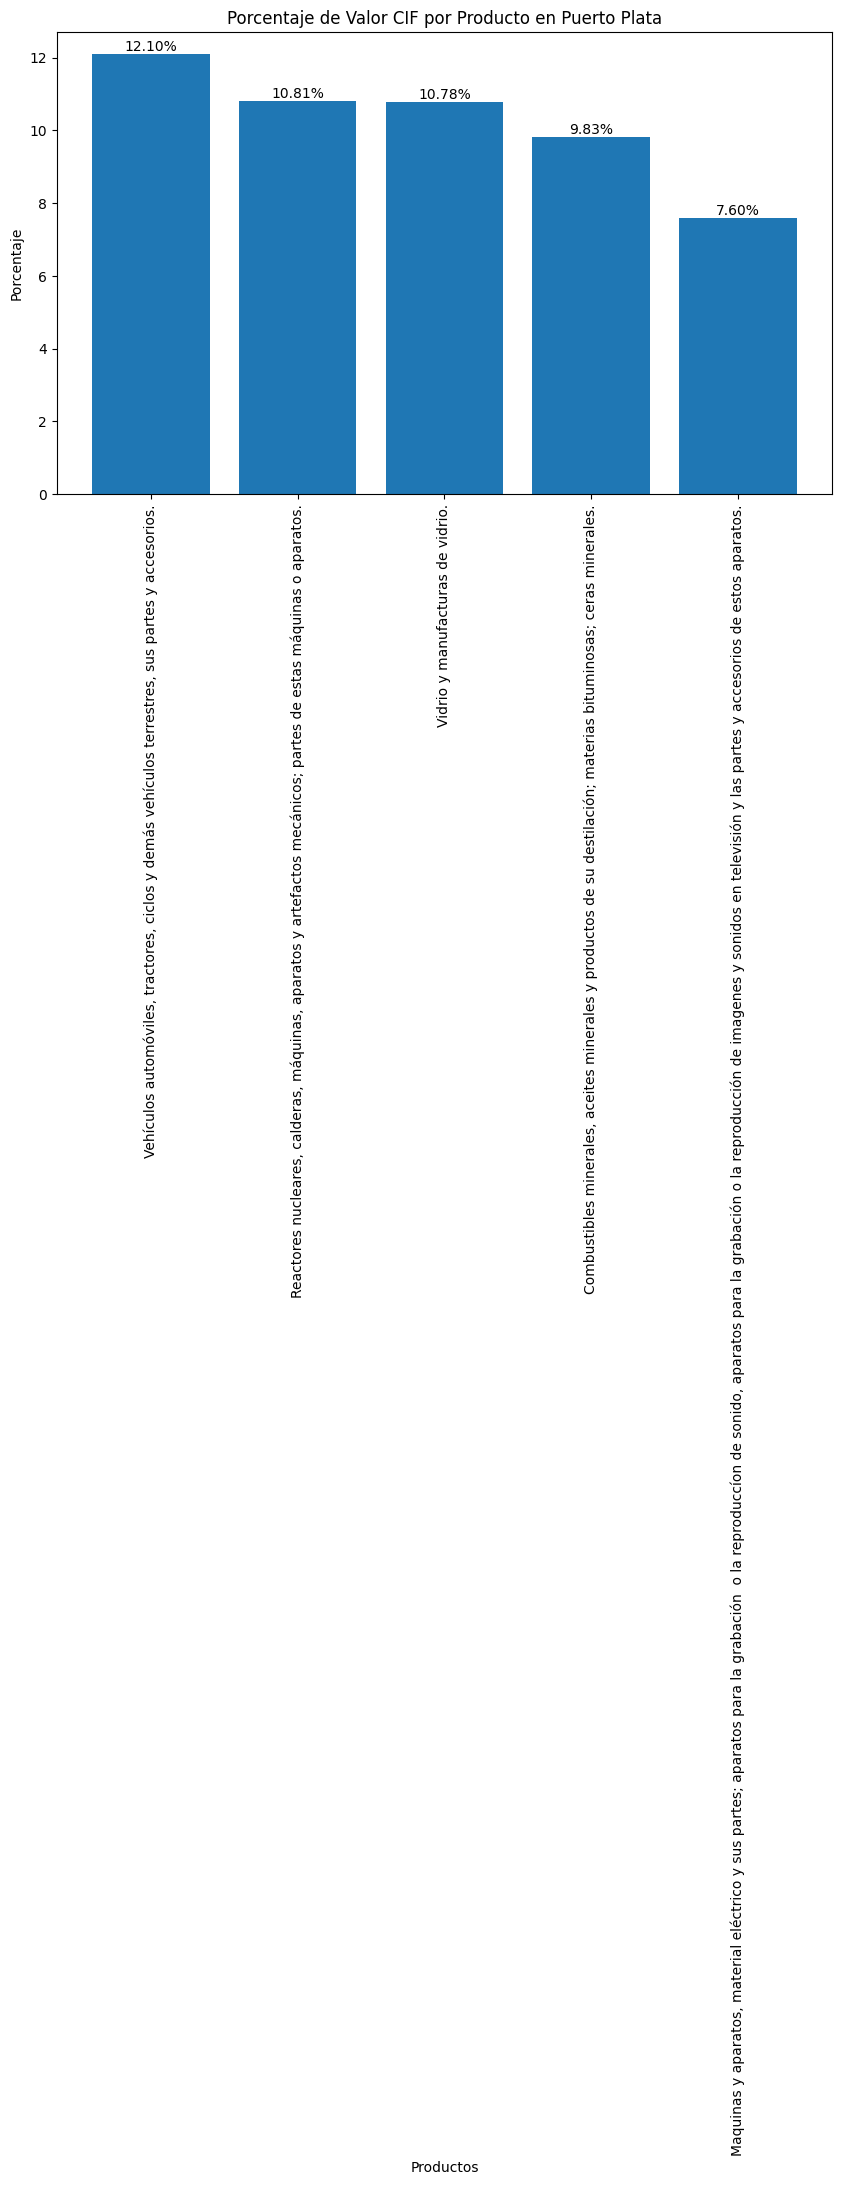

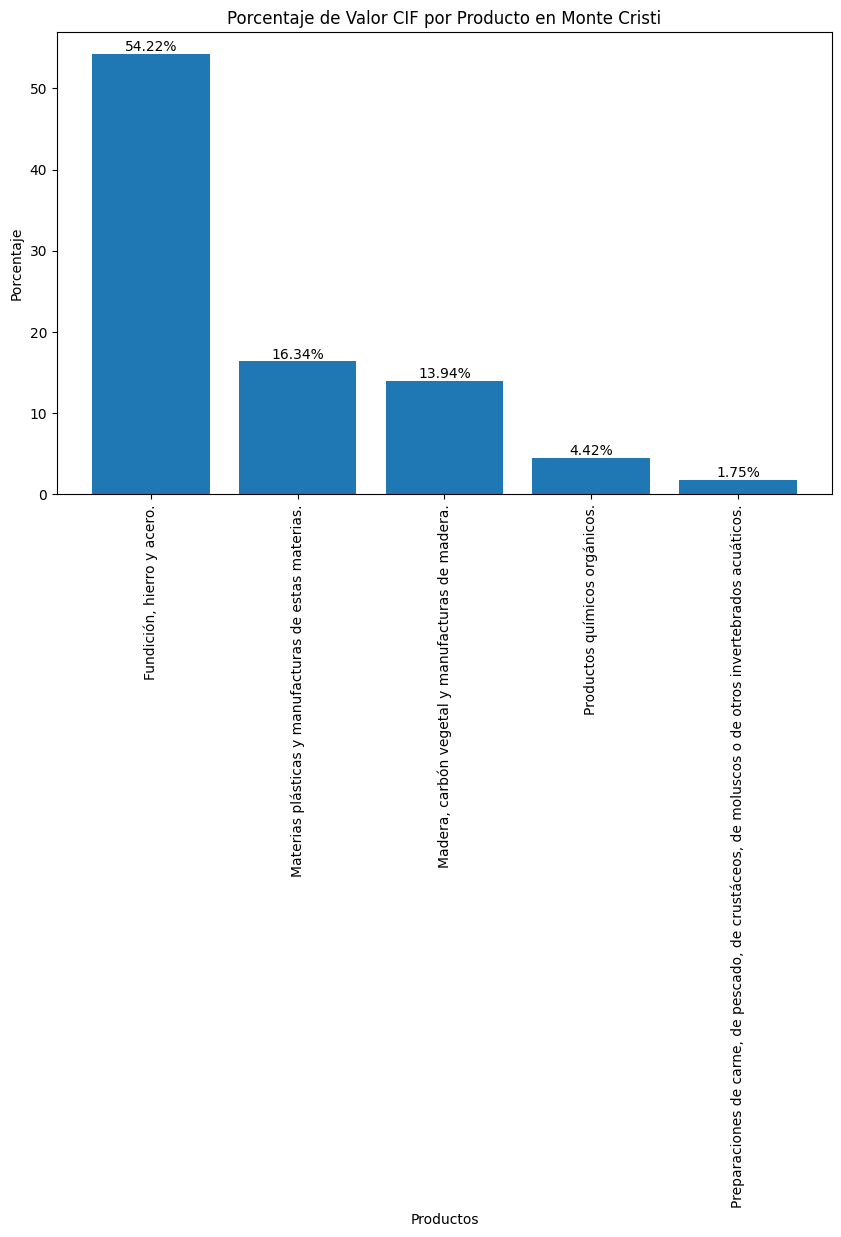

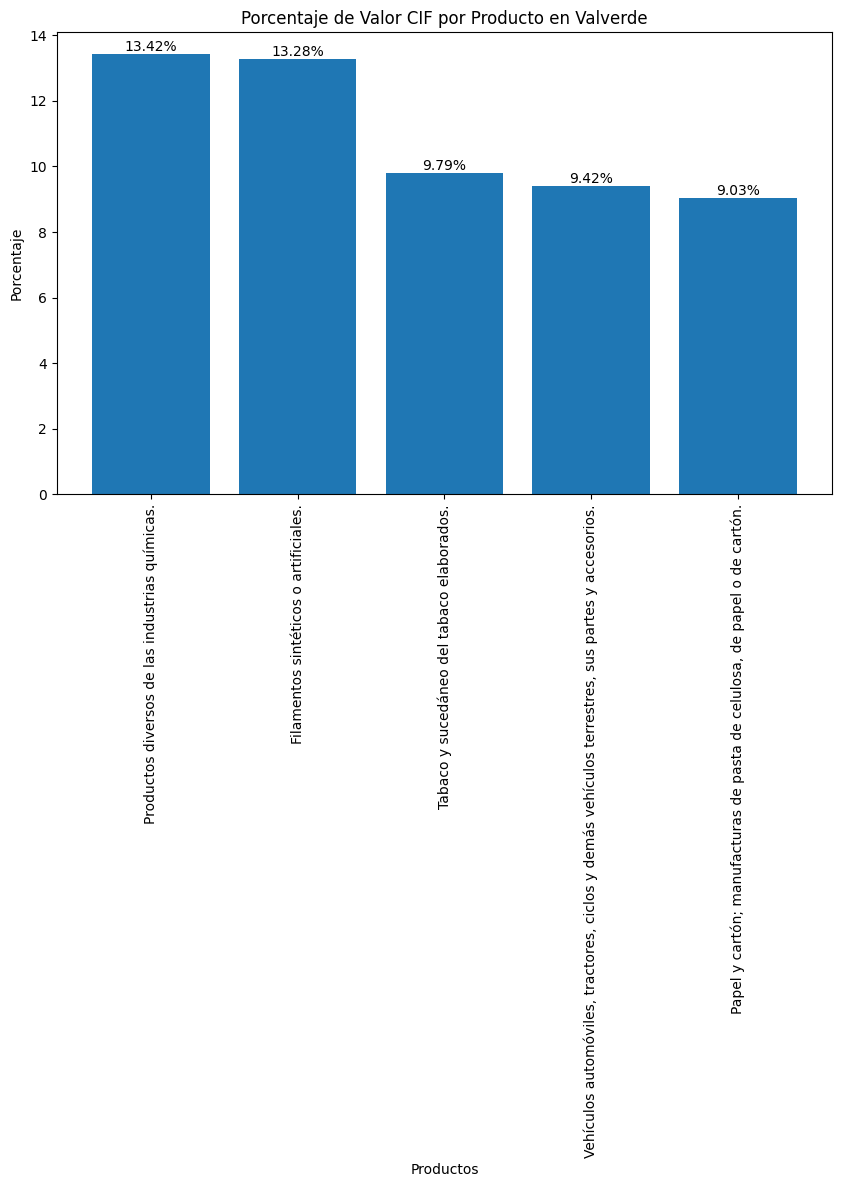

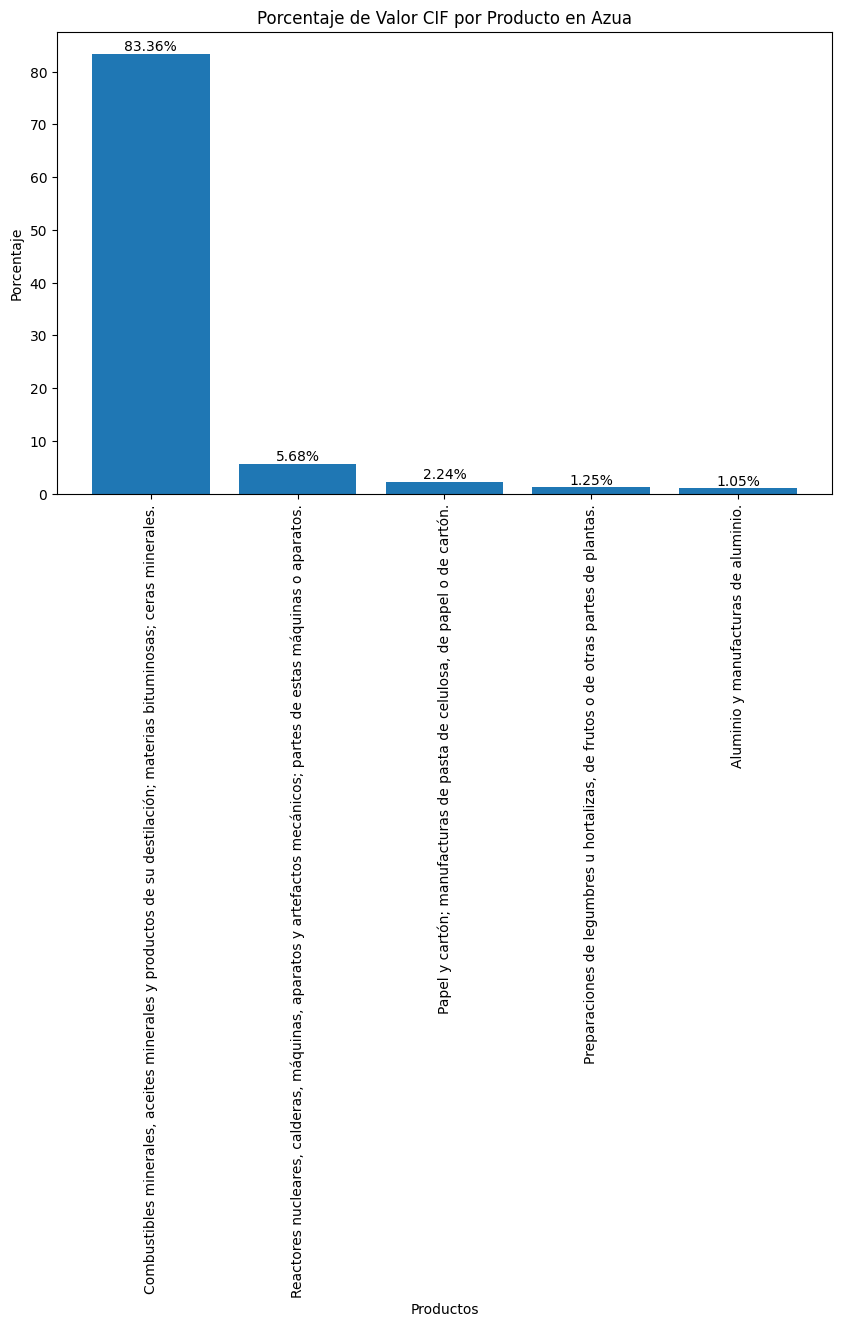

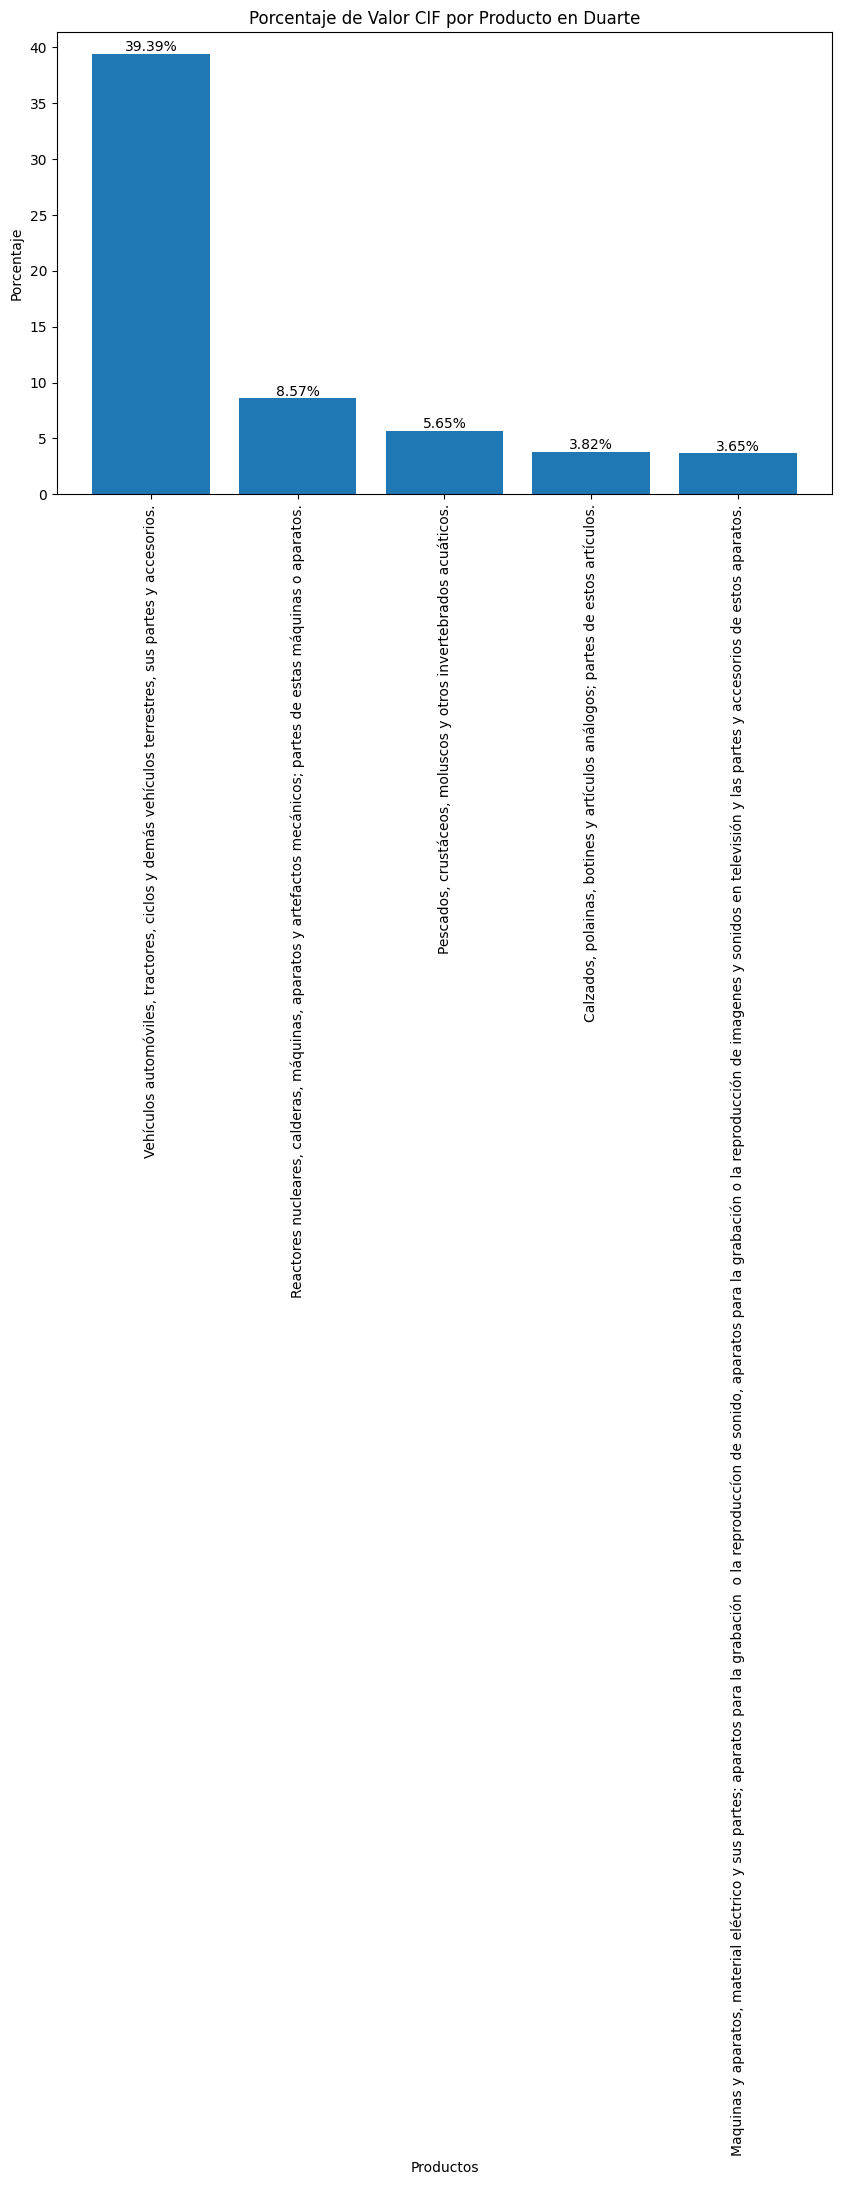

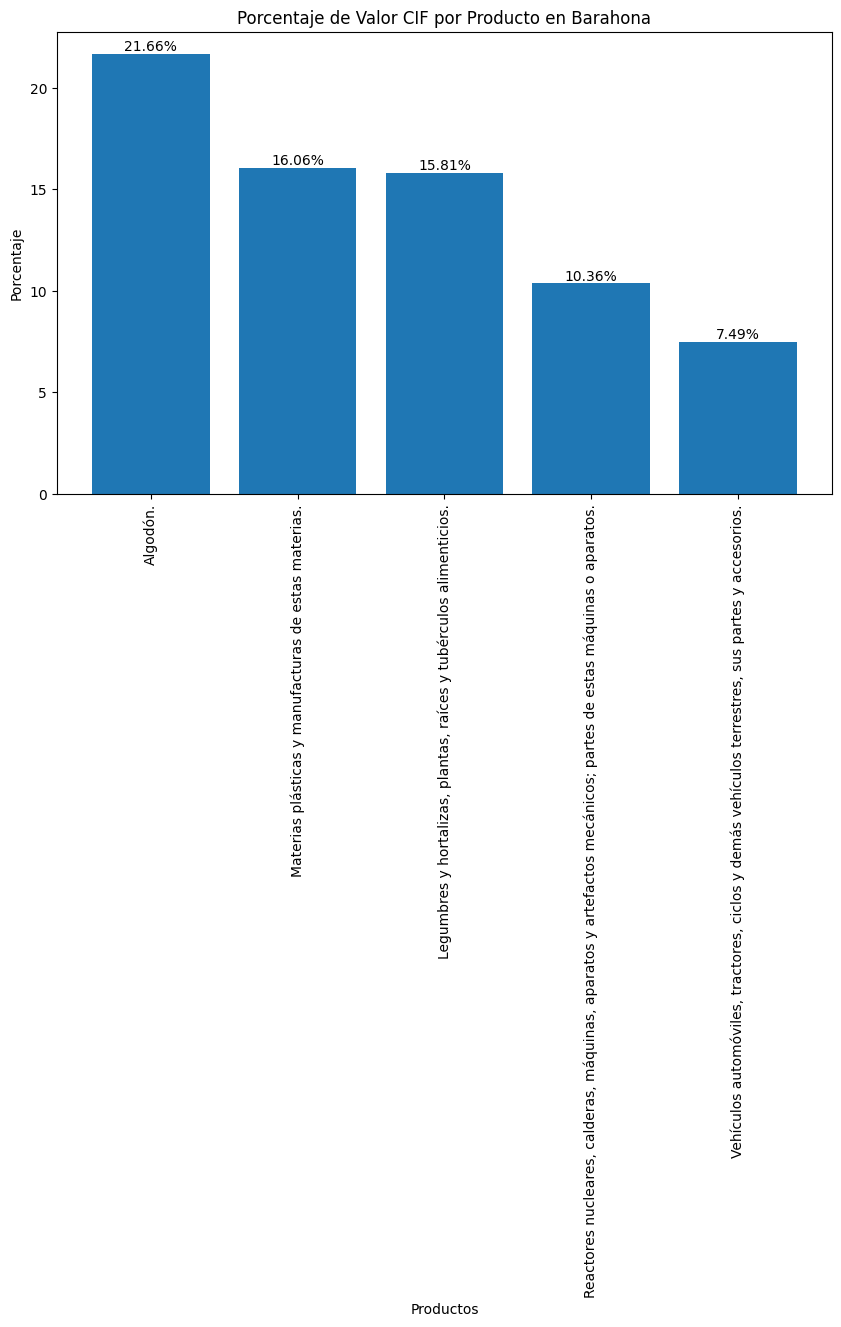

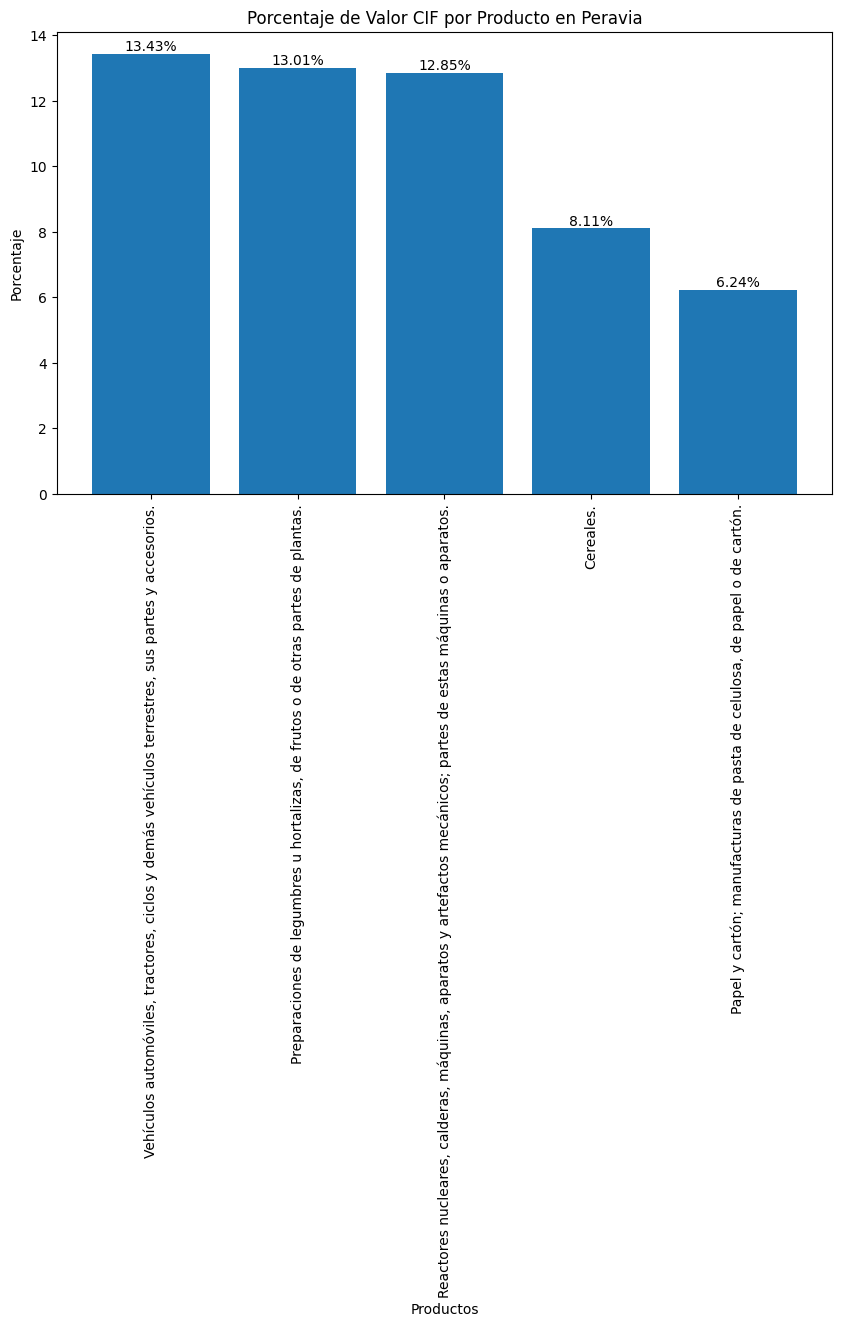

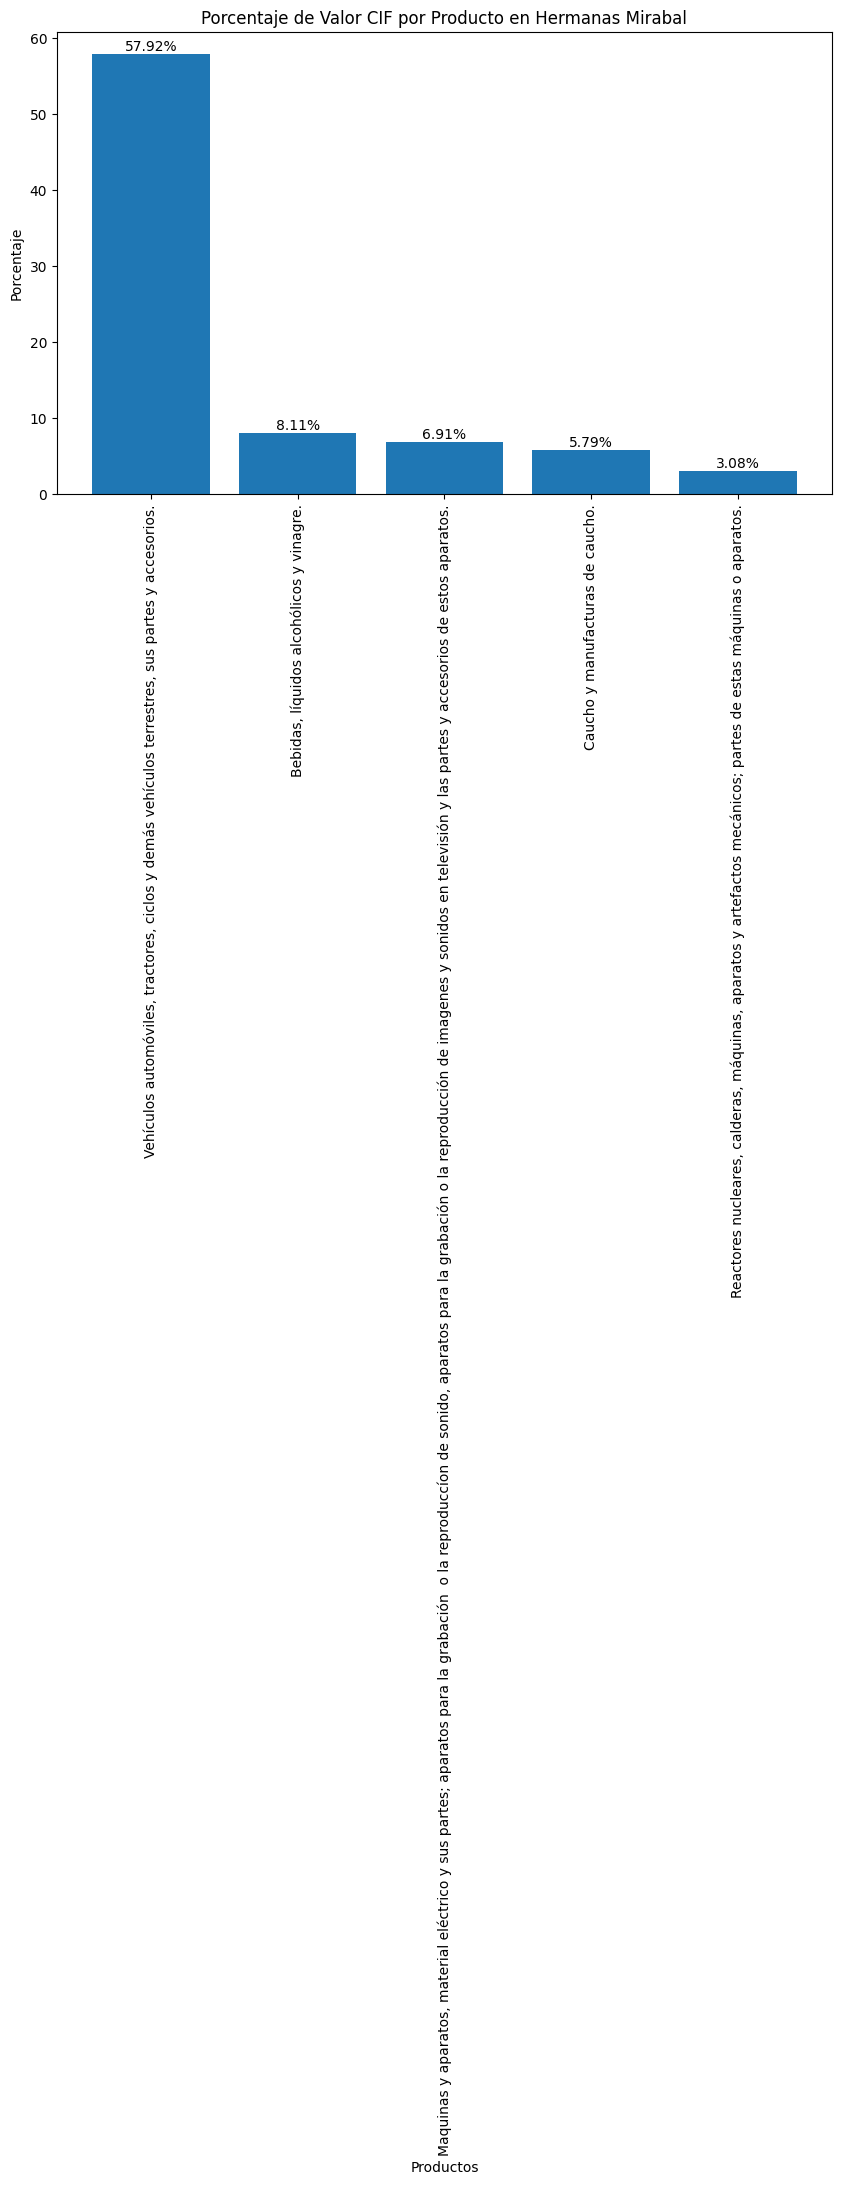

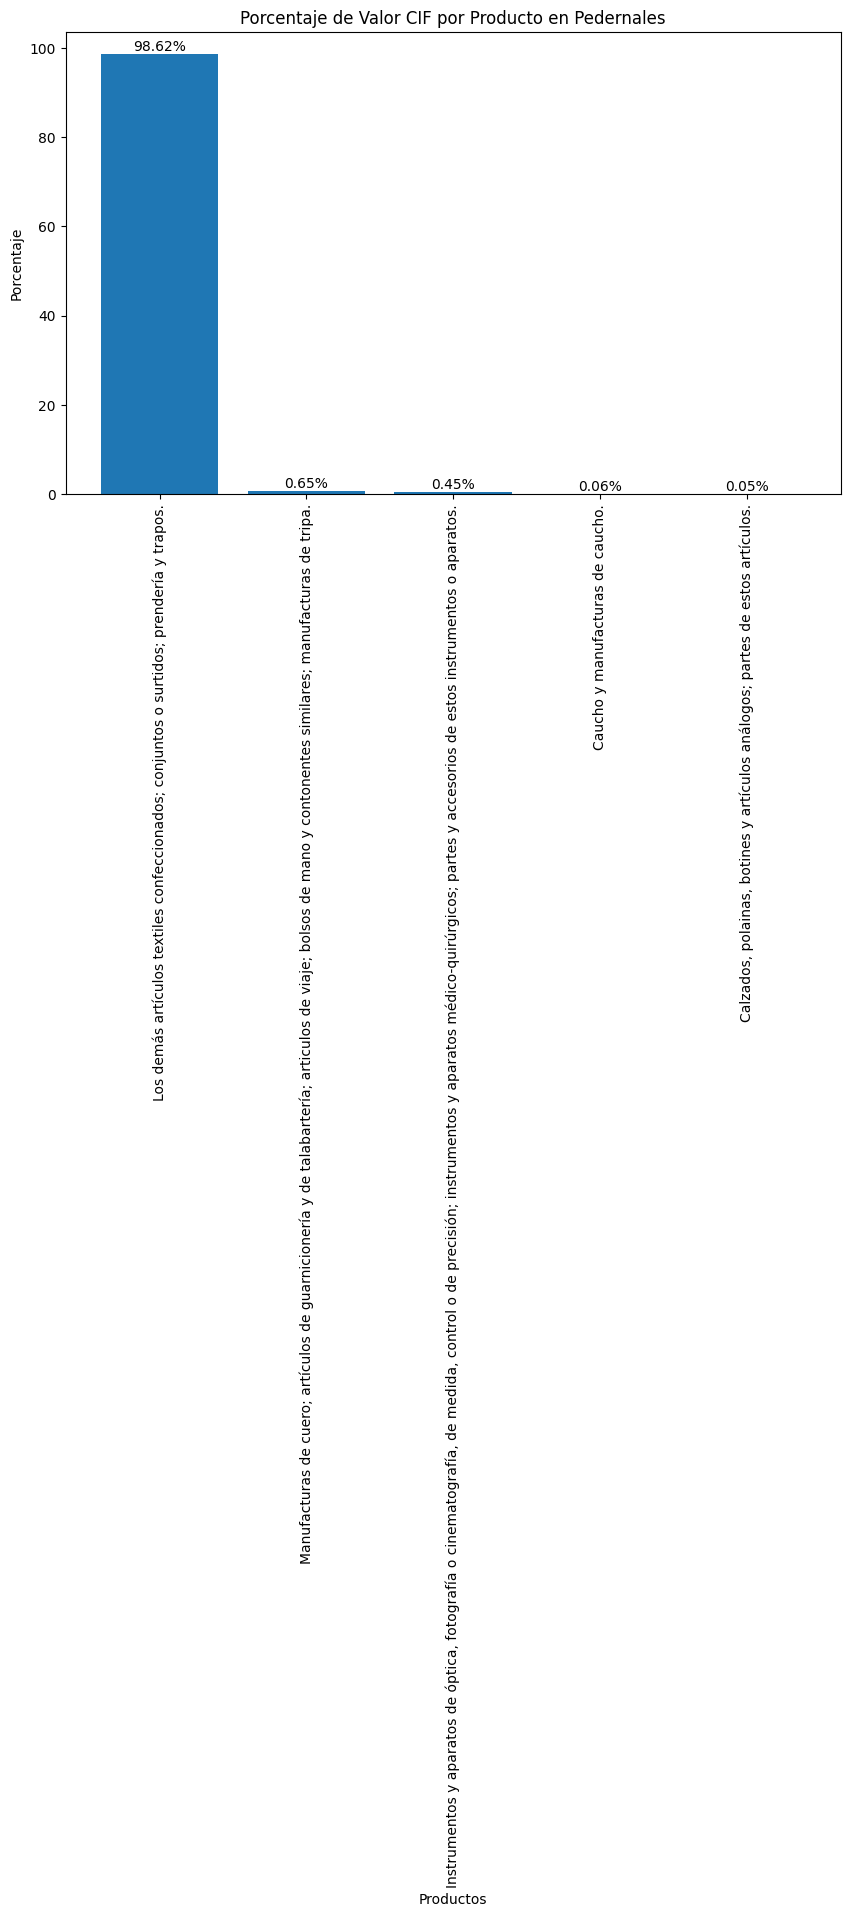

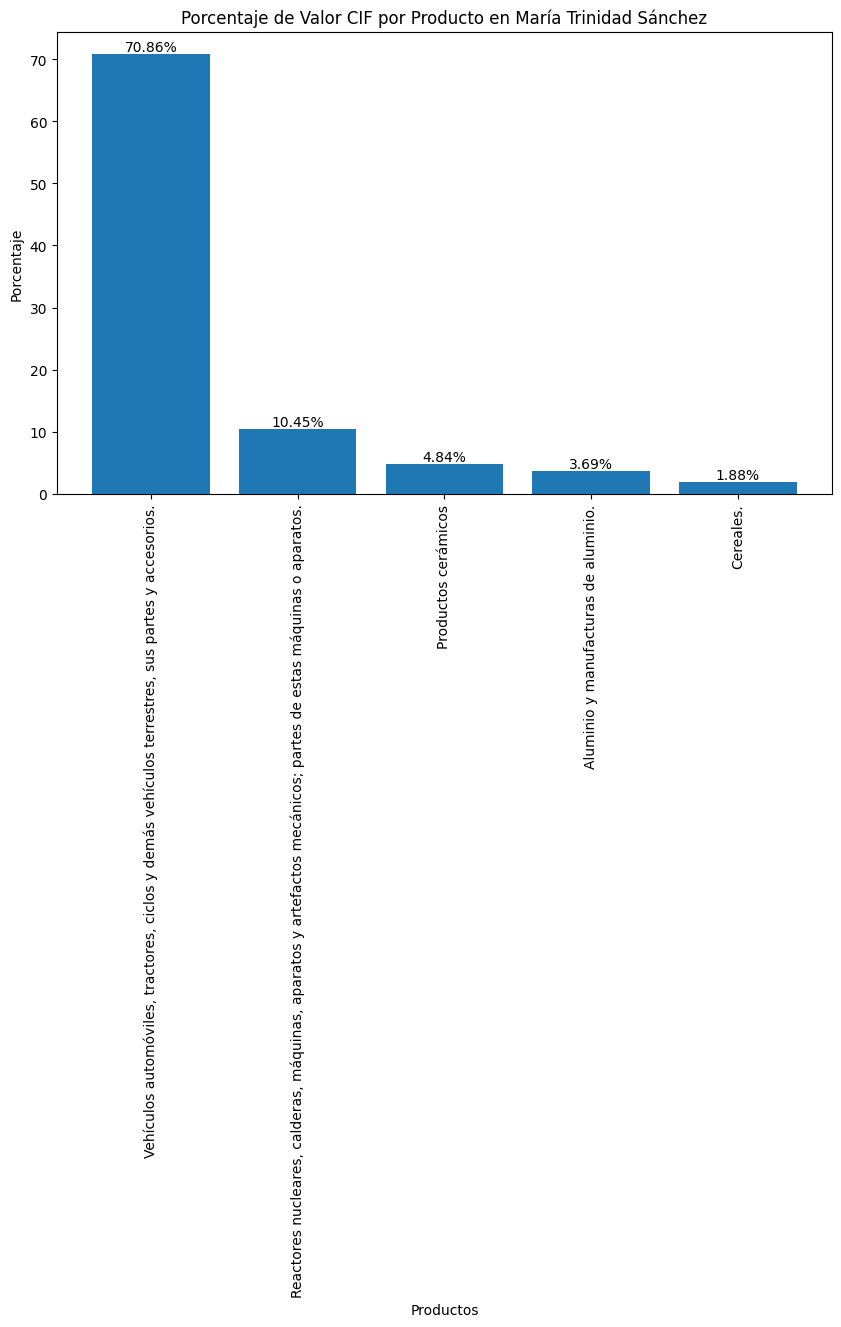

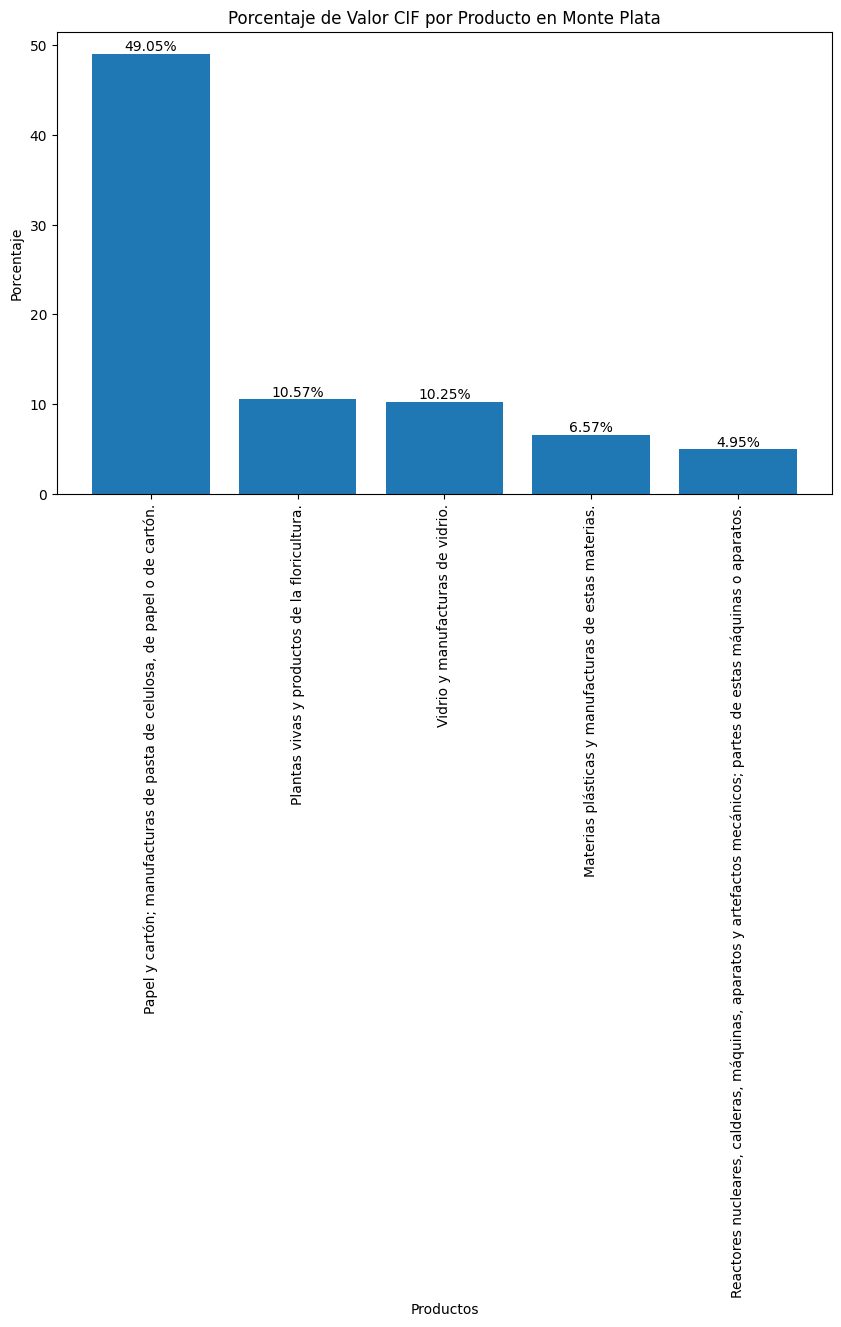

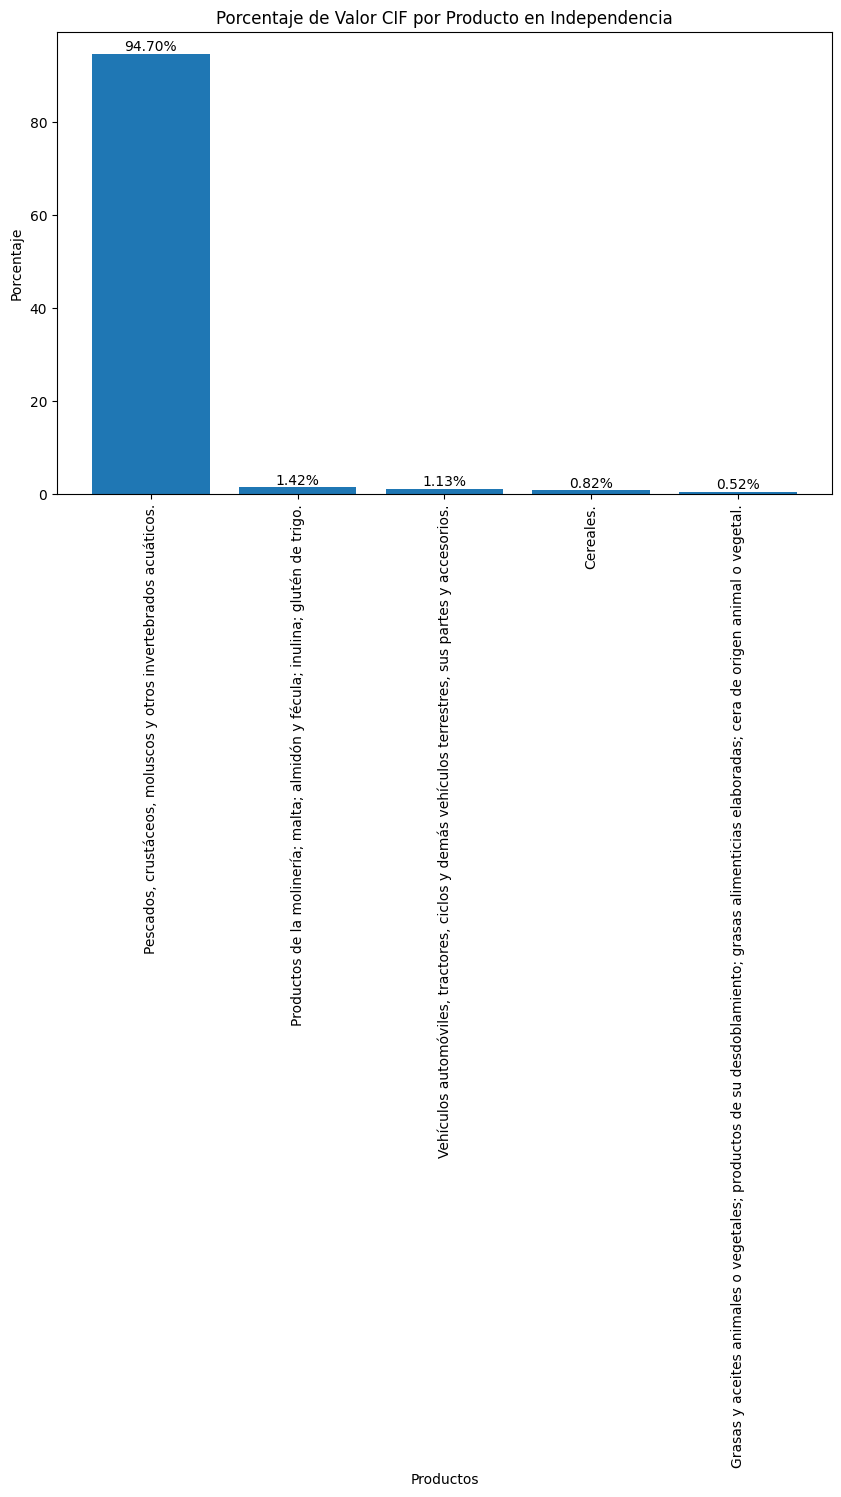

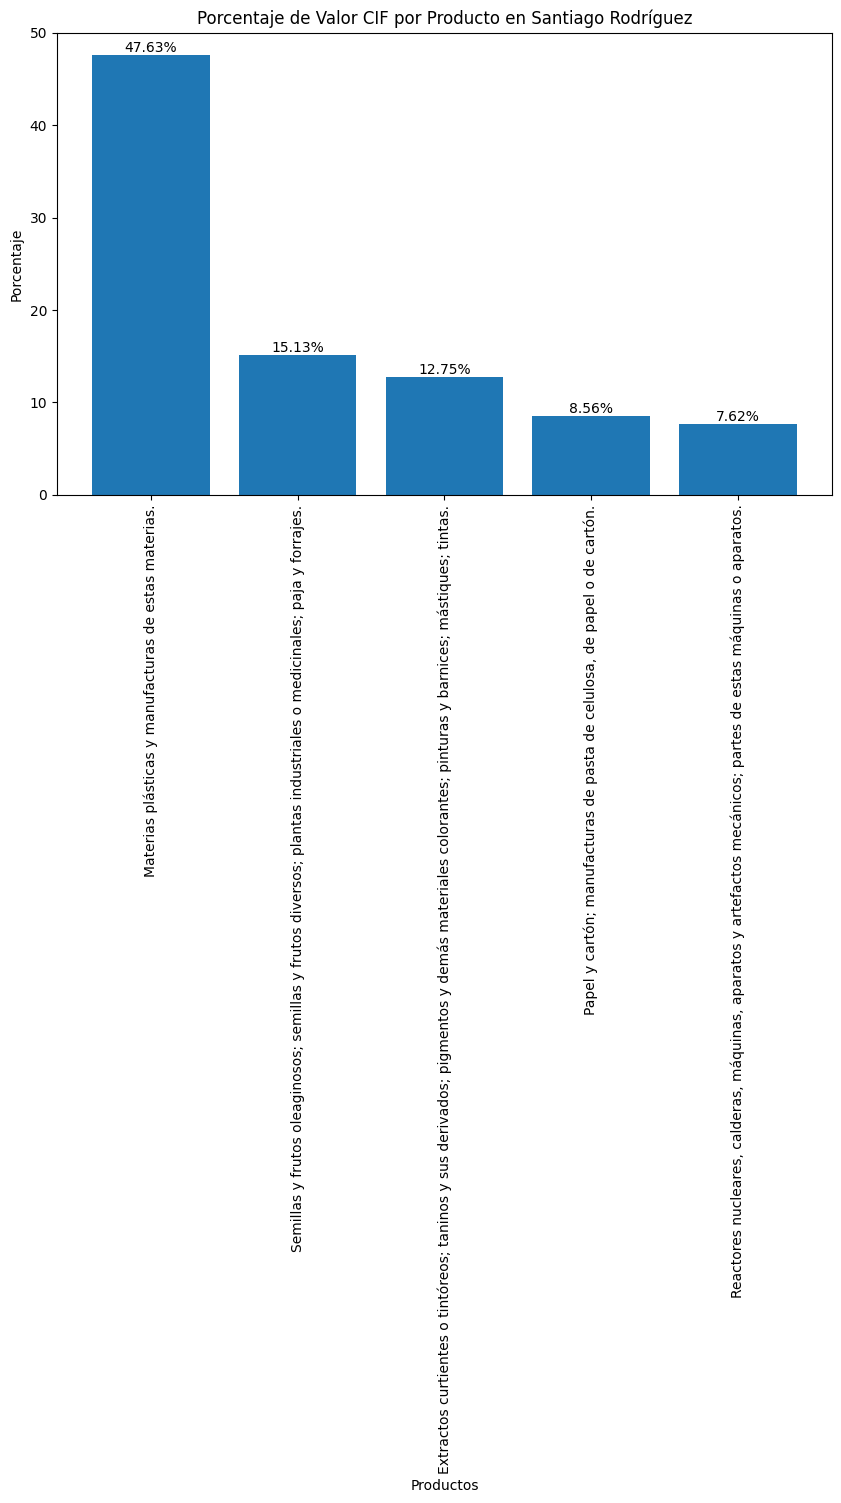

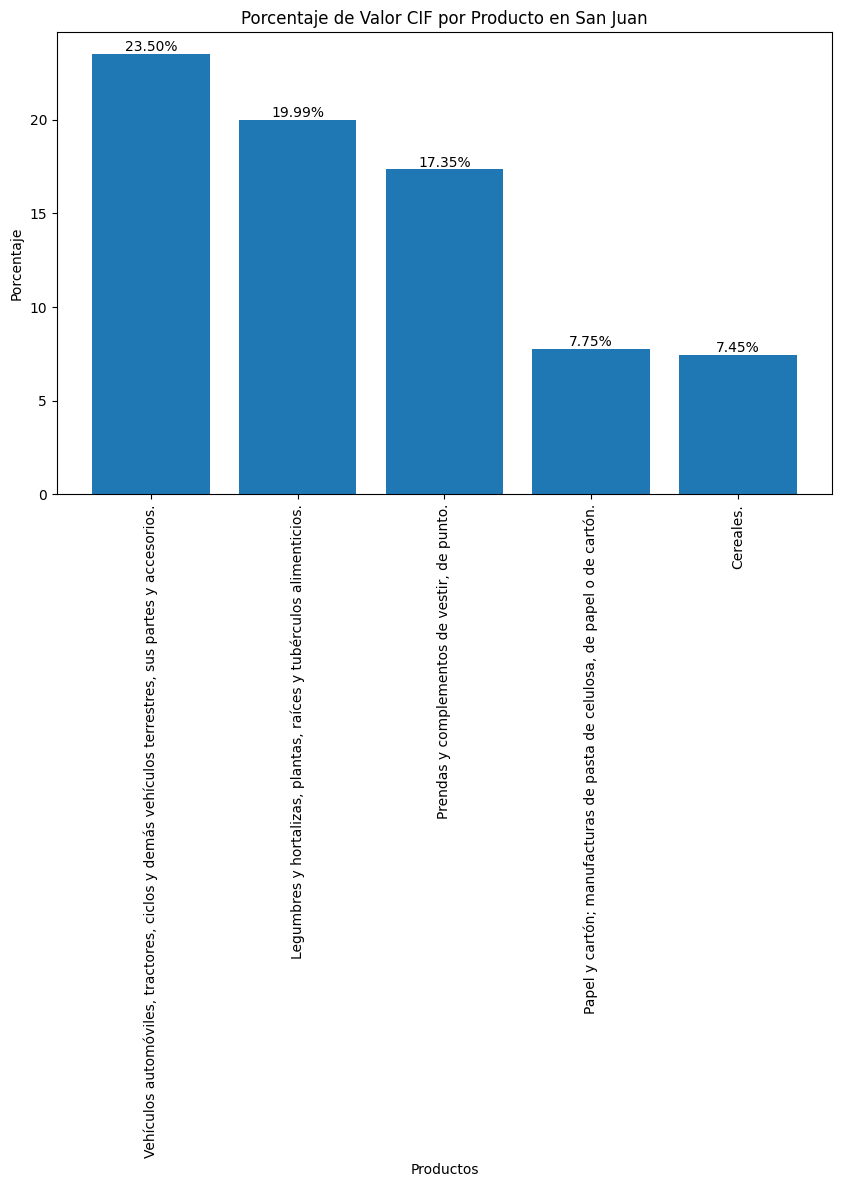

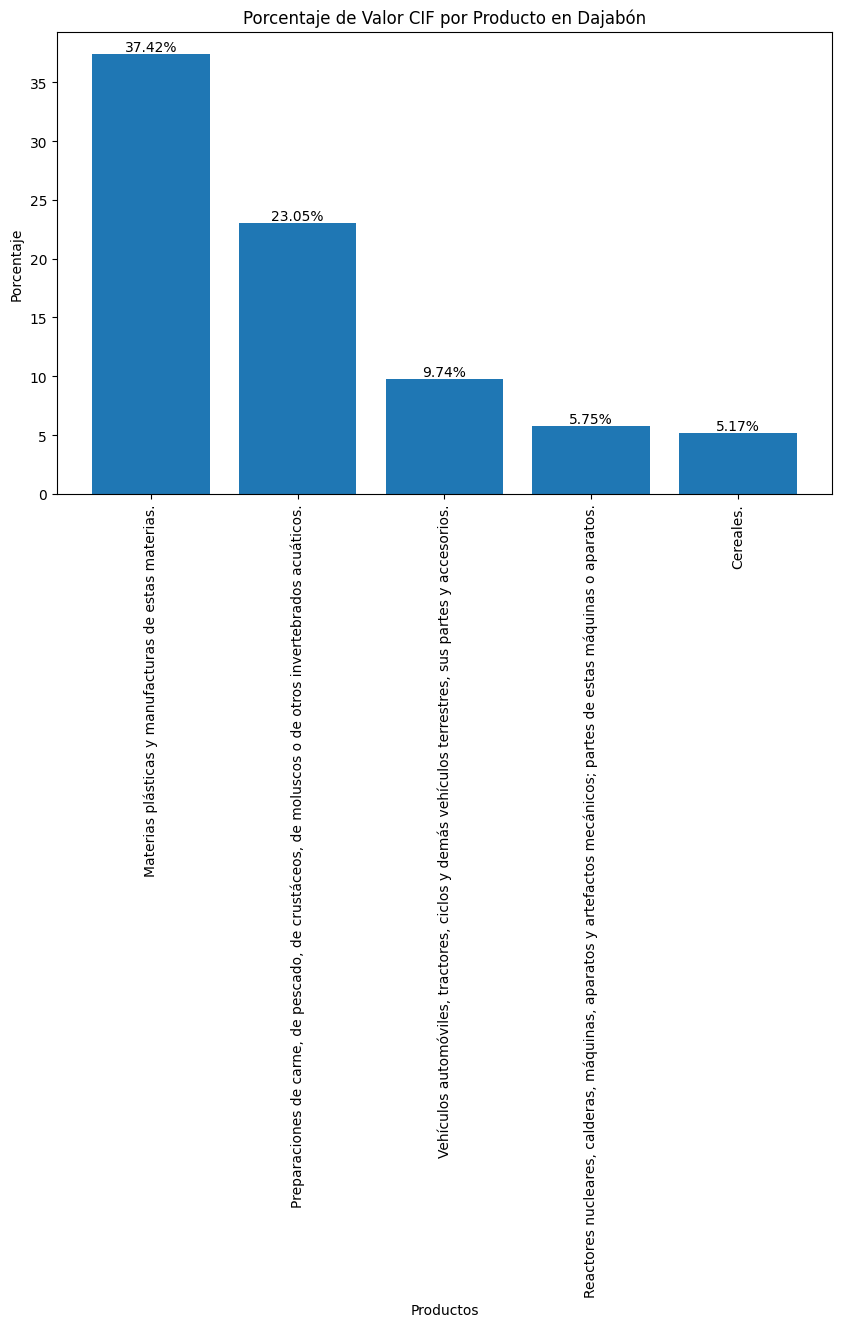

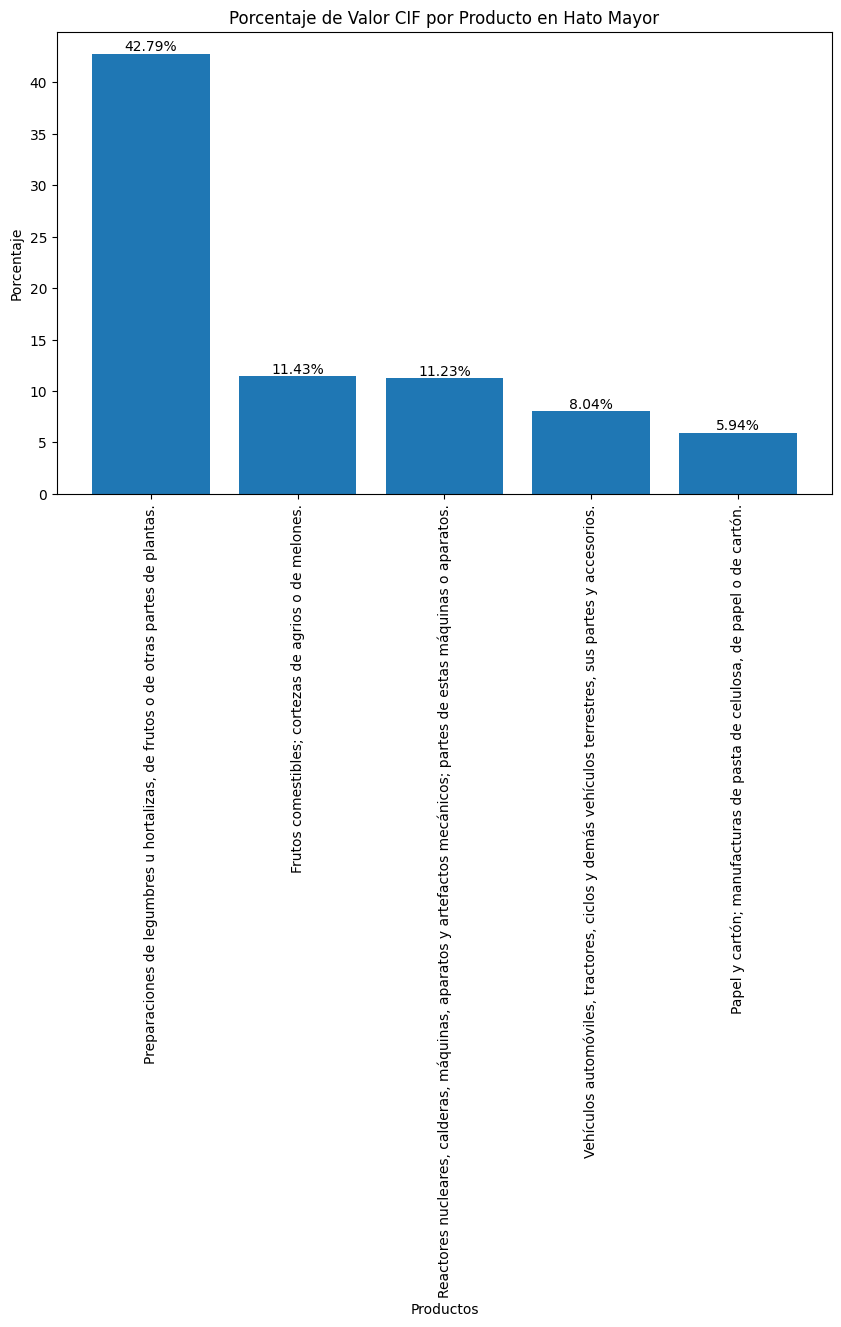

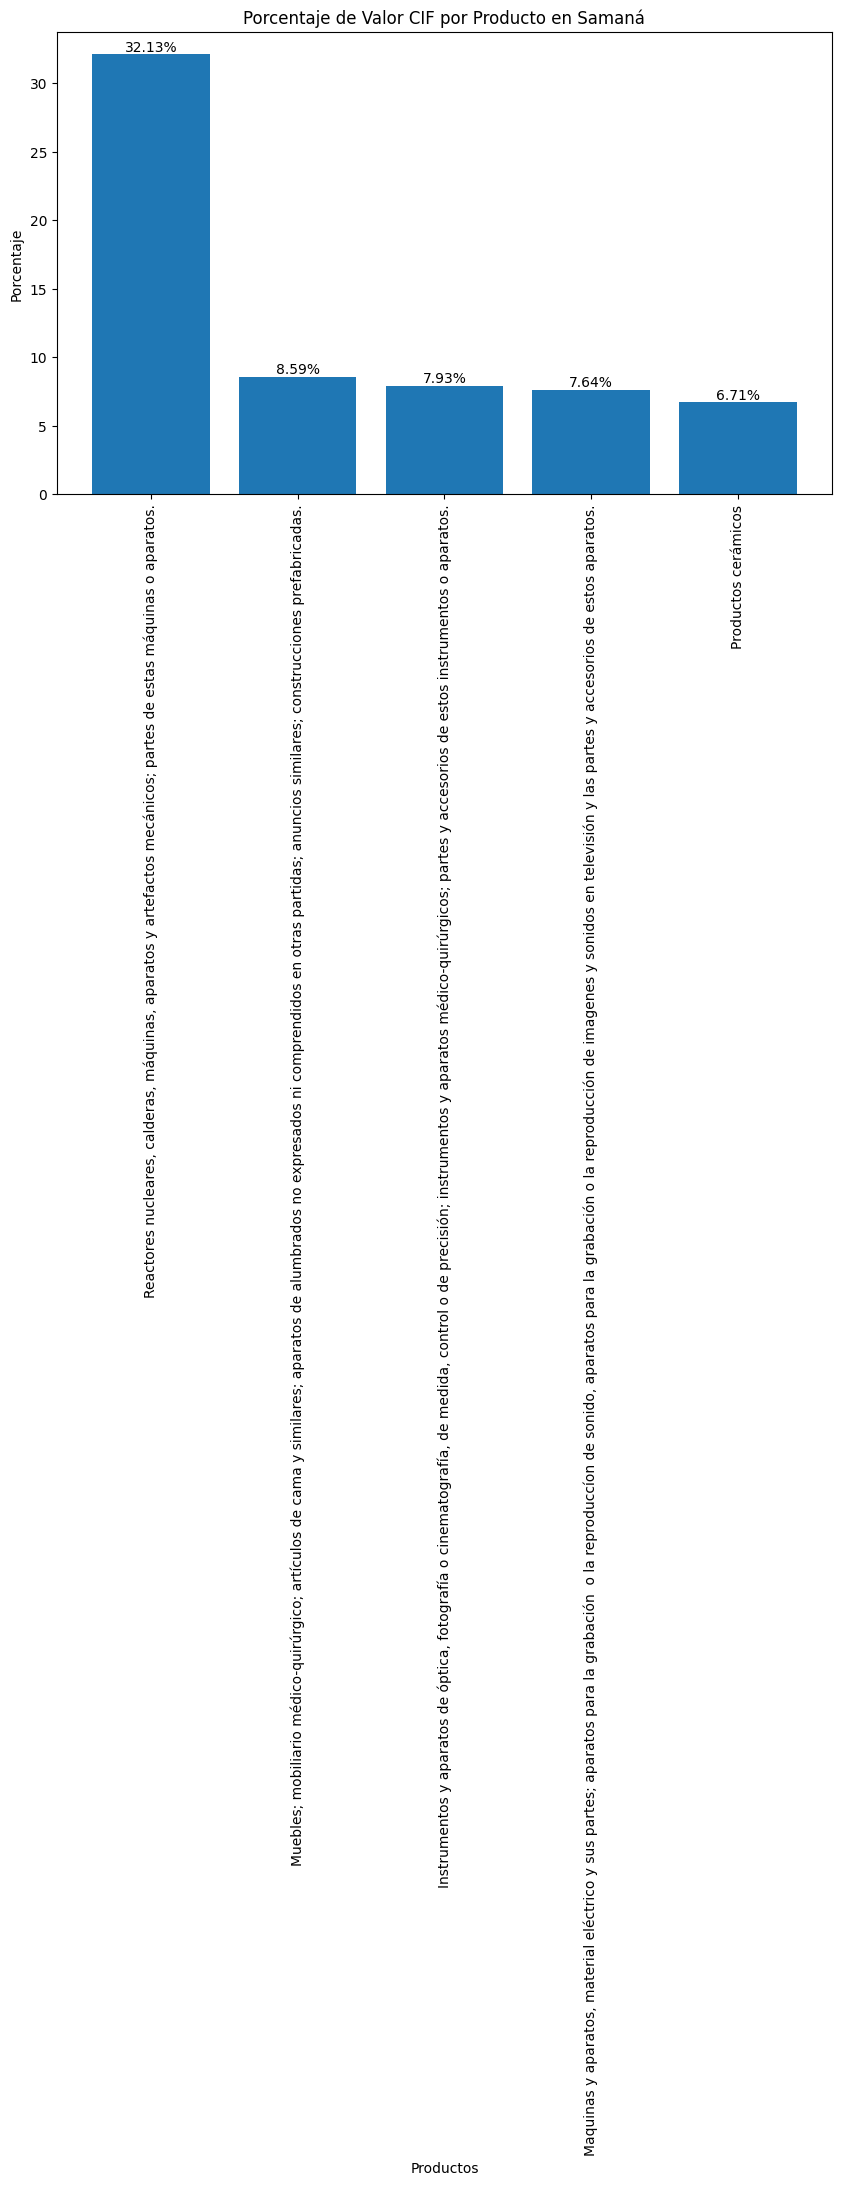

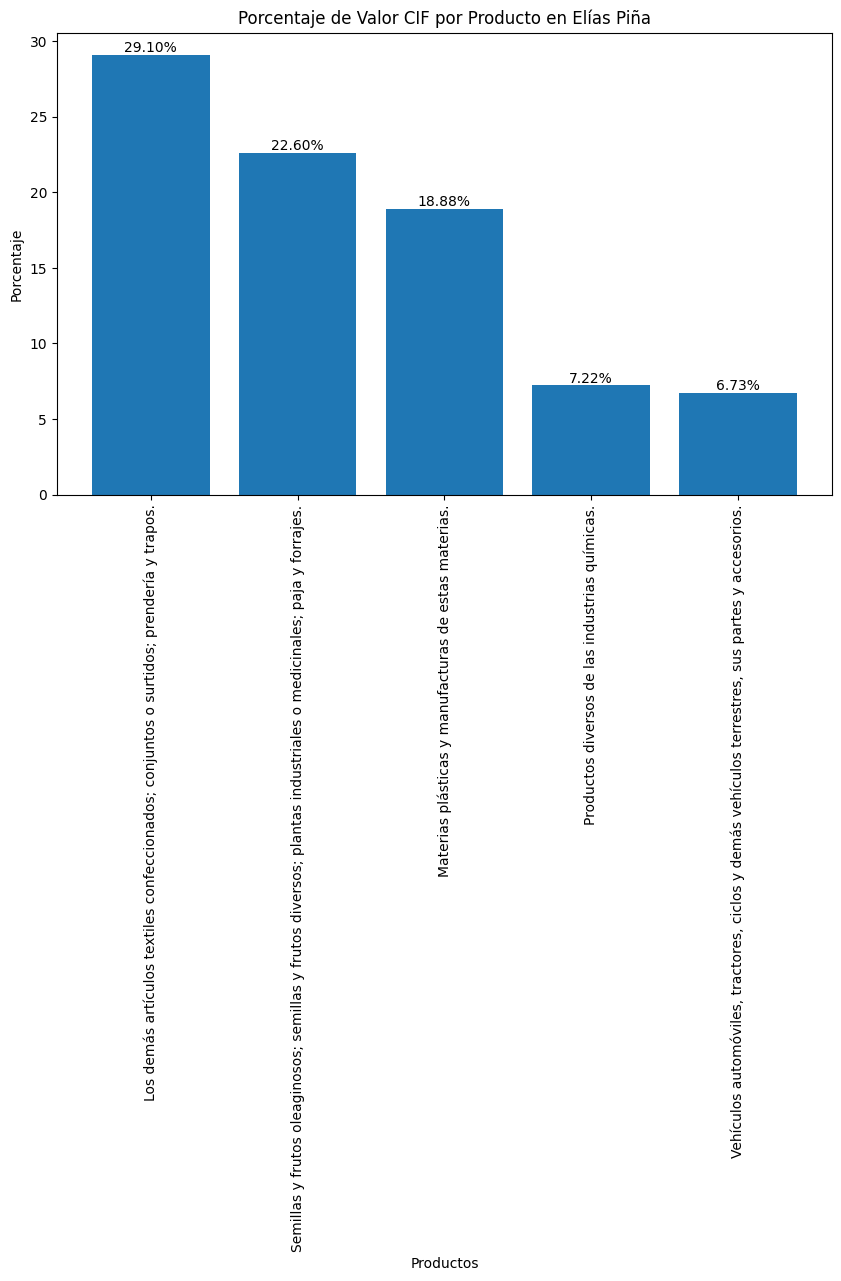

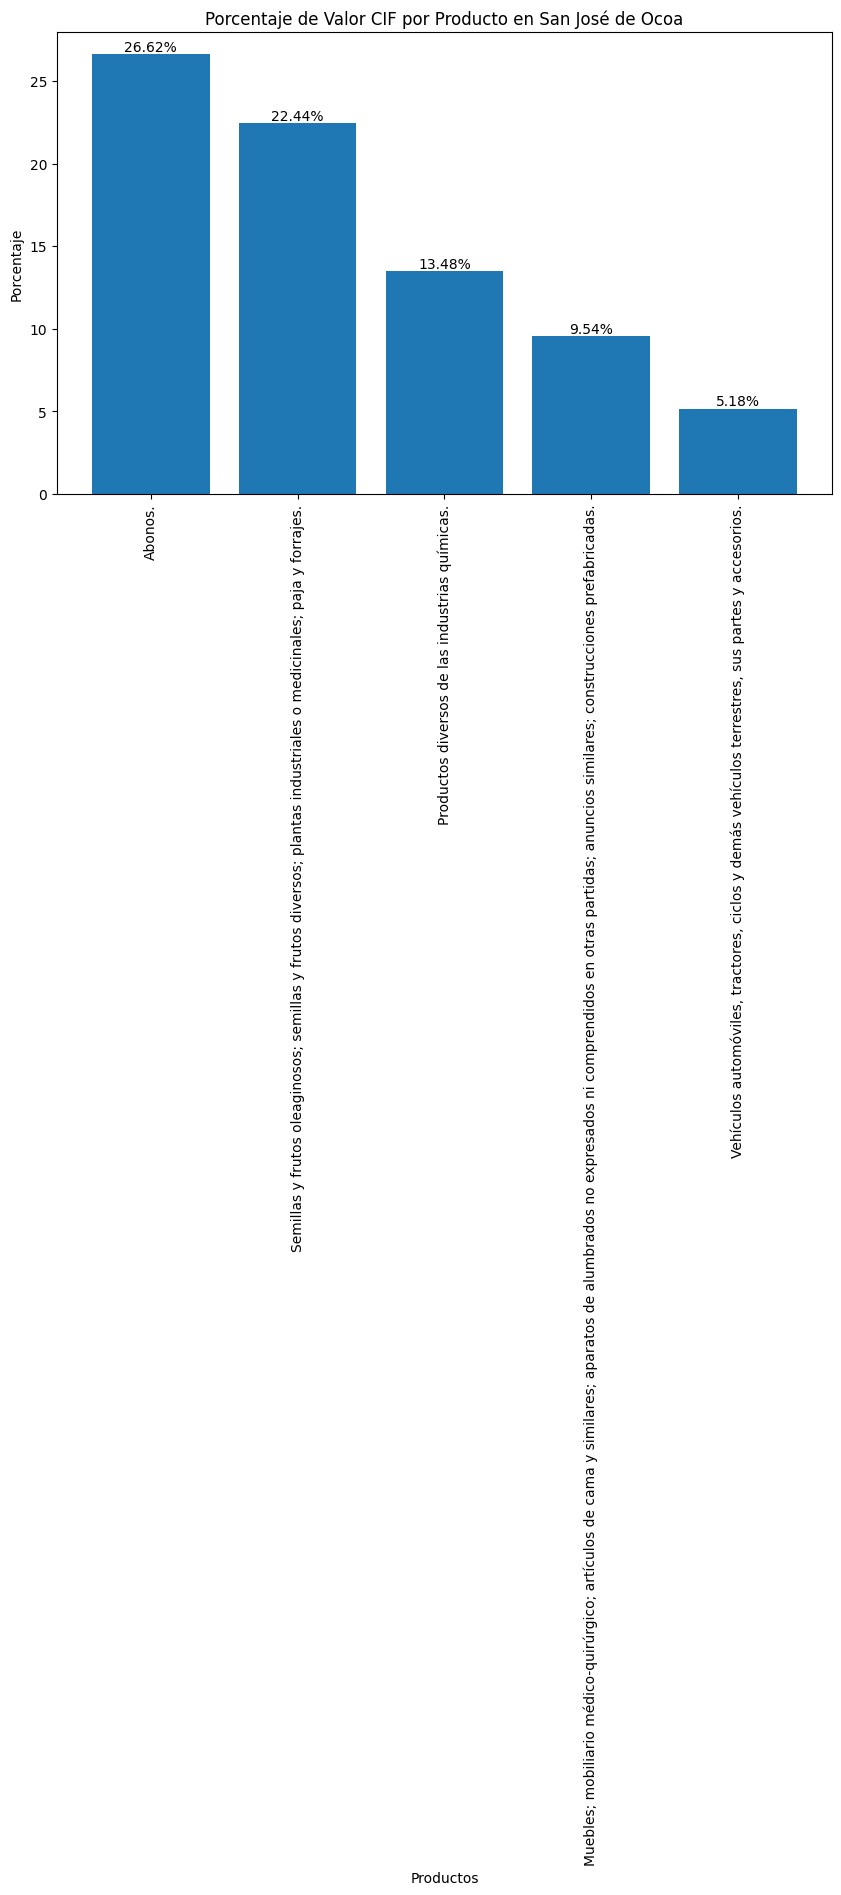

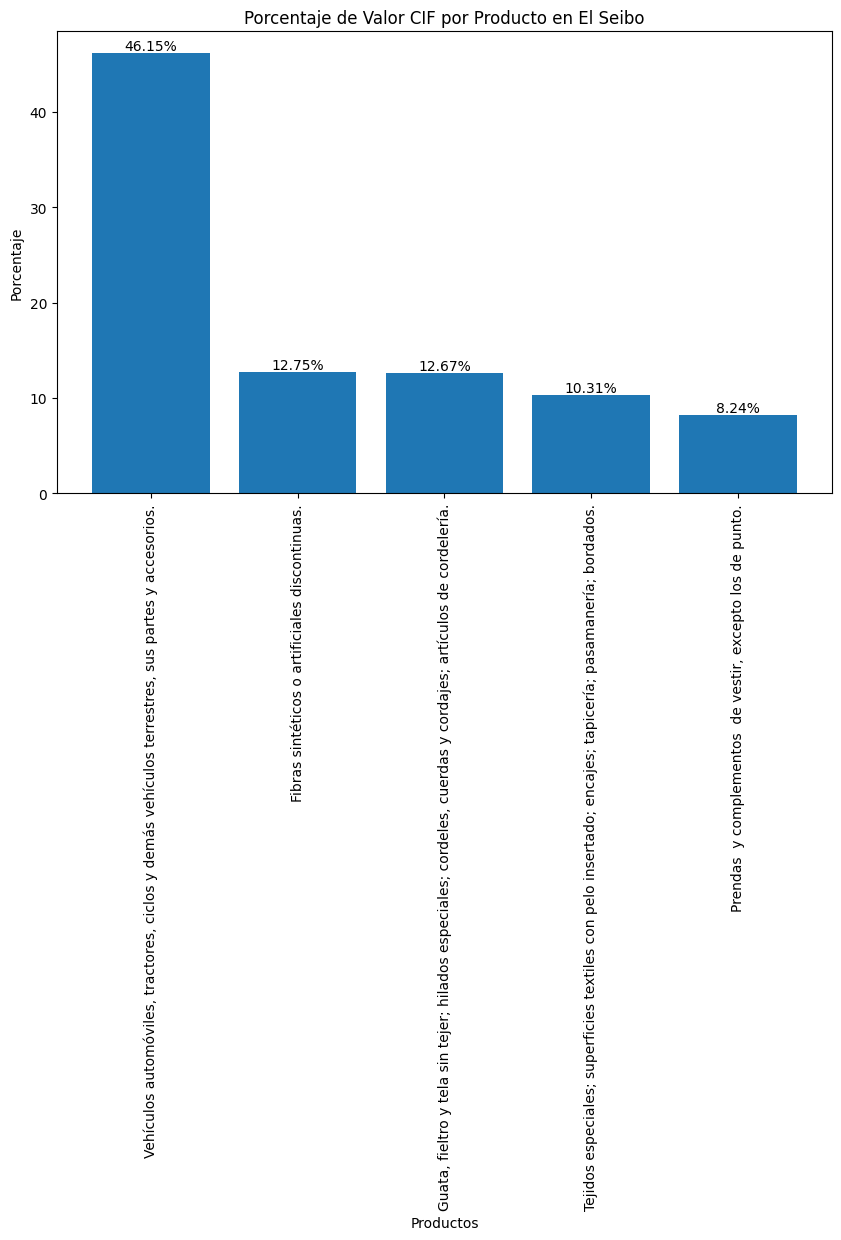

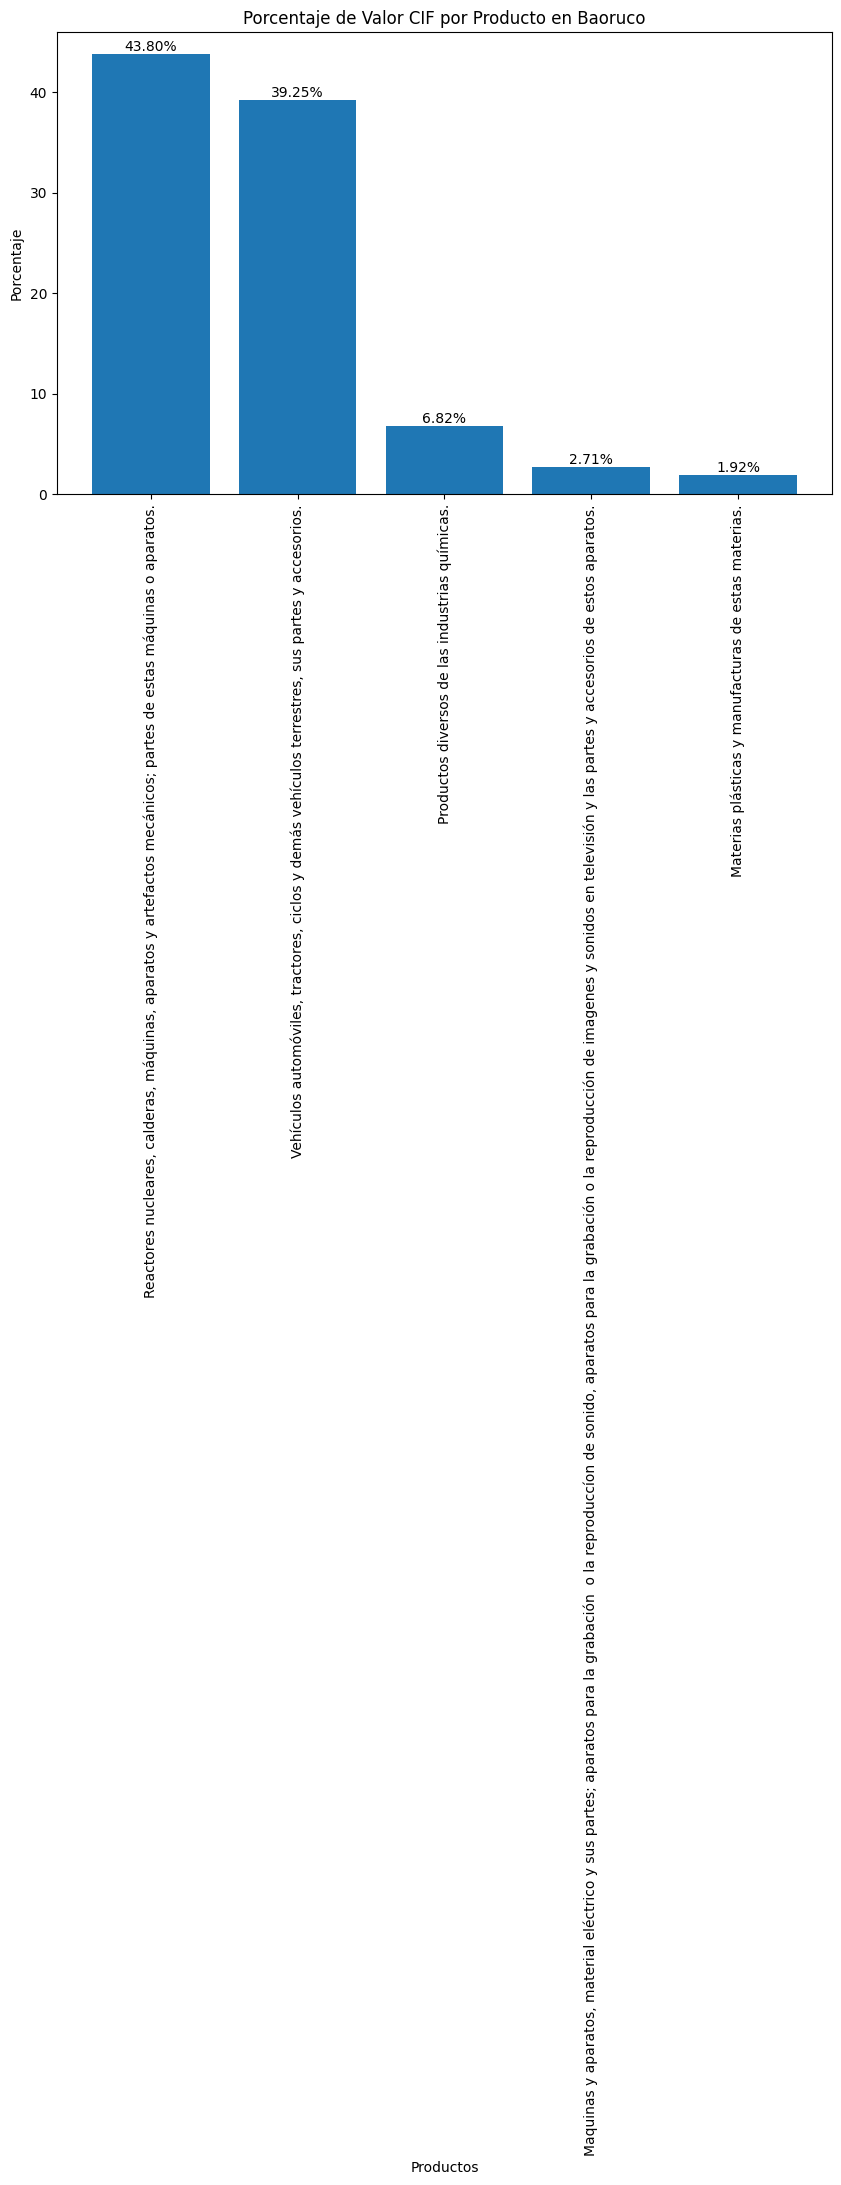

In [66]:

import matplotlib.pyplot as plt

# Agrupación por Provincia y Descripción de Productos
df_grouped = df.groupby(['Provincia_Ubicacion','Capitulo_desc_SA'])['Valor_CIF_USD'].sum().reset_index()

# Calcular el Porcentaje de la Suma Total por Provincia
df_grouped['Porcentaje'] = (df_grouped['Valor_CIF_USD'] / df_grouped.groupby('Provincia_Ubicacion')['Valor_CIF_USD'].transform('sum')) * 100

#print(df_grouped)

#Creación de DataFrames separados para cada provincia y grafica de los porcentajes de los primeros 5 productos
provincias = df_grouped_sorted_1['Provincia_Ubicacion'].unique()  # Lista de provincias únicas

#print(provincias)
for provincia in provincias:
    # Filtrar los datos solo para la provincia actual
    df_provincia_actual = df_grouped[df_grouped['Provincia_Ubicacion'] == provincia]
    
    # Ordenar por porcentaje de mayor a menor y seleccionar los primeros 5 productos
    df_provincia_actual_sorted = df_provincia_actual.sort_values('Porcentaje', ascending=False).head(5)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_provincia_actual_sorted['Capitulo_desc_SA'], df_provincia_actual_sorted['Porcentaje'])
    
    # Rotar los nombres de las etiquetas del eje X a vertical
    plt.xticks(rotation=90)
    
    # Personalizar el gráfico
    plt.ylabel('Porcentaje')
    plt.xlabel('Productos')
    plt.title(f'Porcentaje de Valor CIF por Producto en {provincia}')
    
    # Agregar etiquetas de porcentaje en cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom')
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [16]:
# Agrupación por Provincia y Descripción de Productos
df_grouped = df.groupby(['Provincia_Ubicacion', 'Capitulo_desc_SA'])['Valor_CIF_USD'].sum().reset_index()

# Creación de DataFrames separados para cada provincia
provincias = df['Provincia_Ubicacion'].unique()  # Lista de provincias únicas

#Ordenamiento de los valores en orden descendente 
df_grouped_sorted = df_grouped.sort_values('Valor_CIF_USD', ascending=False)

# Creación de diccionario para almacenar los DataFrames por provincia
dataframes_por_provincia = {}

for provincia in provincias:
    # Filtración de los datos solo para la provincia actual
    df_provincia_actual = df_grouped[df_grouped['Provincia_Ubicacion'] == provincia]
    
    # Asignación de nombre específico a cada DataFrame (usando el nombre de la provincia)
    dataframes_por_provincia[provincia] = df_provincia_actual

#Imprimir los DataFrames resultantes
# for provincia, df_provincia in dataframes_por_provincia.items():
#     print(f"DataFrame para {provincia}:")
#     print(df_provincia)
#     print("\n")

# for provincia in dataframes_por_provincia:
#     print(f"DataFrame para {provincia}")
#     #print("\n")